In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scorecardpy as sc
import pprint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Import Data #

In [2]:
bureau_data = pd.read_csv('IS453 Group Assignment - Bureau Data.csv')
bureau_data_copy = bureau_data.copy()
bureau_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [3]:
app_data = pd.read_csv('IS453 Group Assignment - Application Data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA (Bureau Data) #

First, we plot histograms to take a look at the distribution of numerical columns.

Observations:

DAYS_CREDIT seems to follow a left skew distribution
Other variables only have 1 bar chart which implies that there is little to no variability or spread in the data

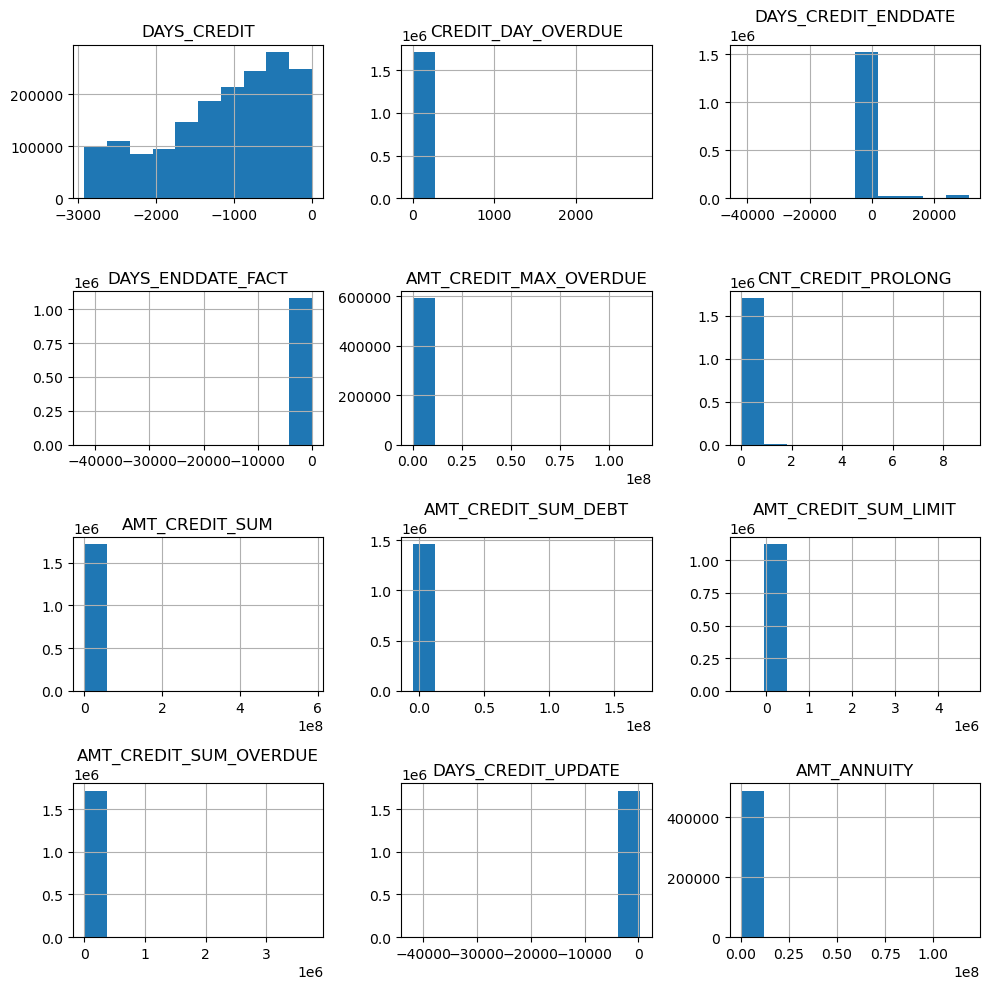

In [4]:
numeric_var = numerical_cols = bureau_data.select_dtypes(include=['int','float']).columns[2::]
bureau_data[numeric_var].hist(figsize=(10,10))
plt.tight_layout()

Next, we wanted to look at the outliers in our dataset and created boxplots for numerical values.

Observations:

Outliers is present in most of the numerical variables and
most of the variables have a narrow boxplot which indicates that the data is tightly clustered or has low variability

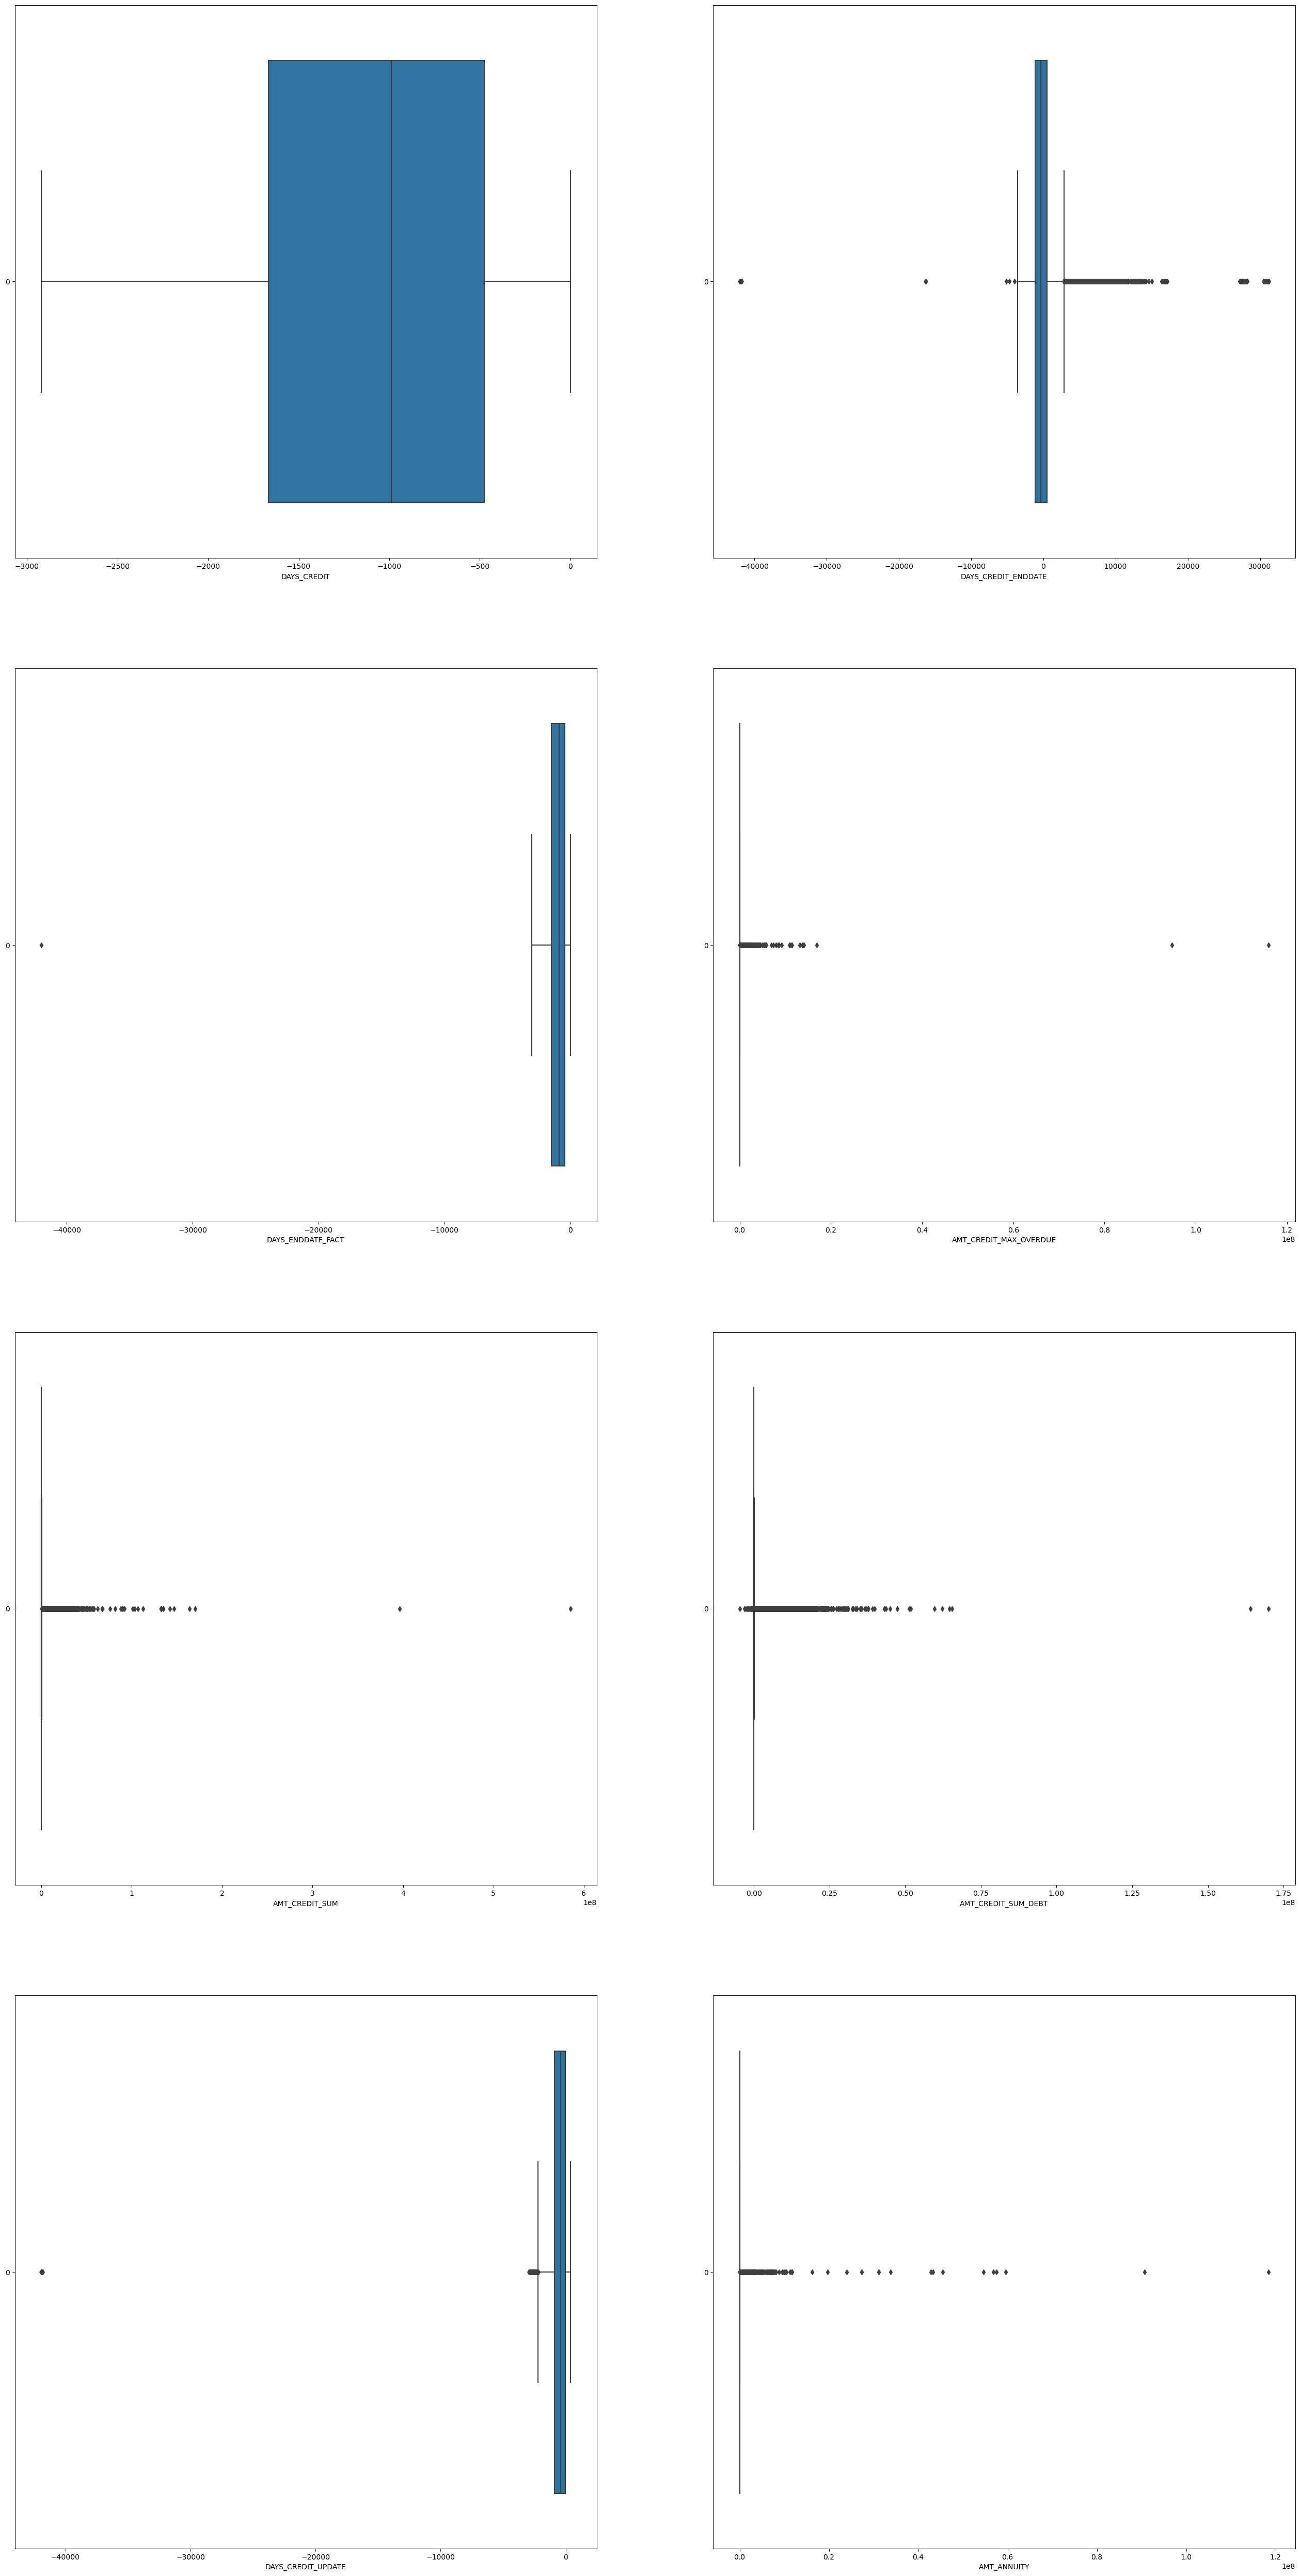

In [5]:
# create boxplots
large_val_numeric_var = ['DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT',
            'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
            'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']

row_count=int(np.ceil(len(large_val_numeric_var)/2))

# create the figure and two subplots
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 64))

for i, axis in enumerate(fig.axes):
    sns.boxplot(ax=axis, data=bureau_data[large_val_numeric_var[i]],orient='h')
    axis.set_xlabel(str(large_val_numeric_var[i]))
    if i == len(large_val_numeric_var)-1:
        break

# Show the plot
plt.show()

Next, we took a look at the distribution of categorical variables using histograms
Observations:

The categorical variables are follows a right skewed distribution

C:\Users\William Lay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\William Lay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\William Lay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\William Lay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


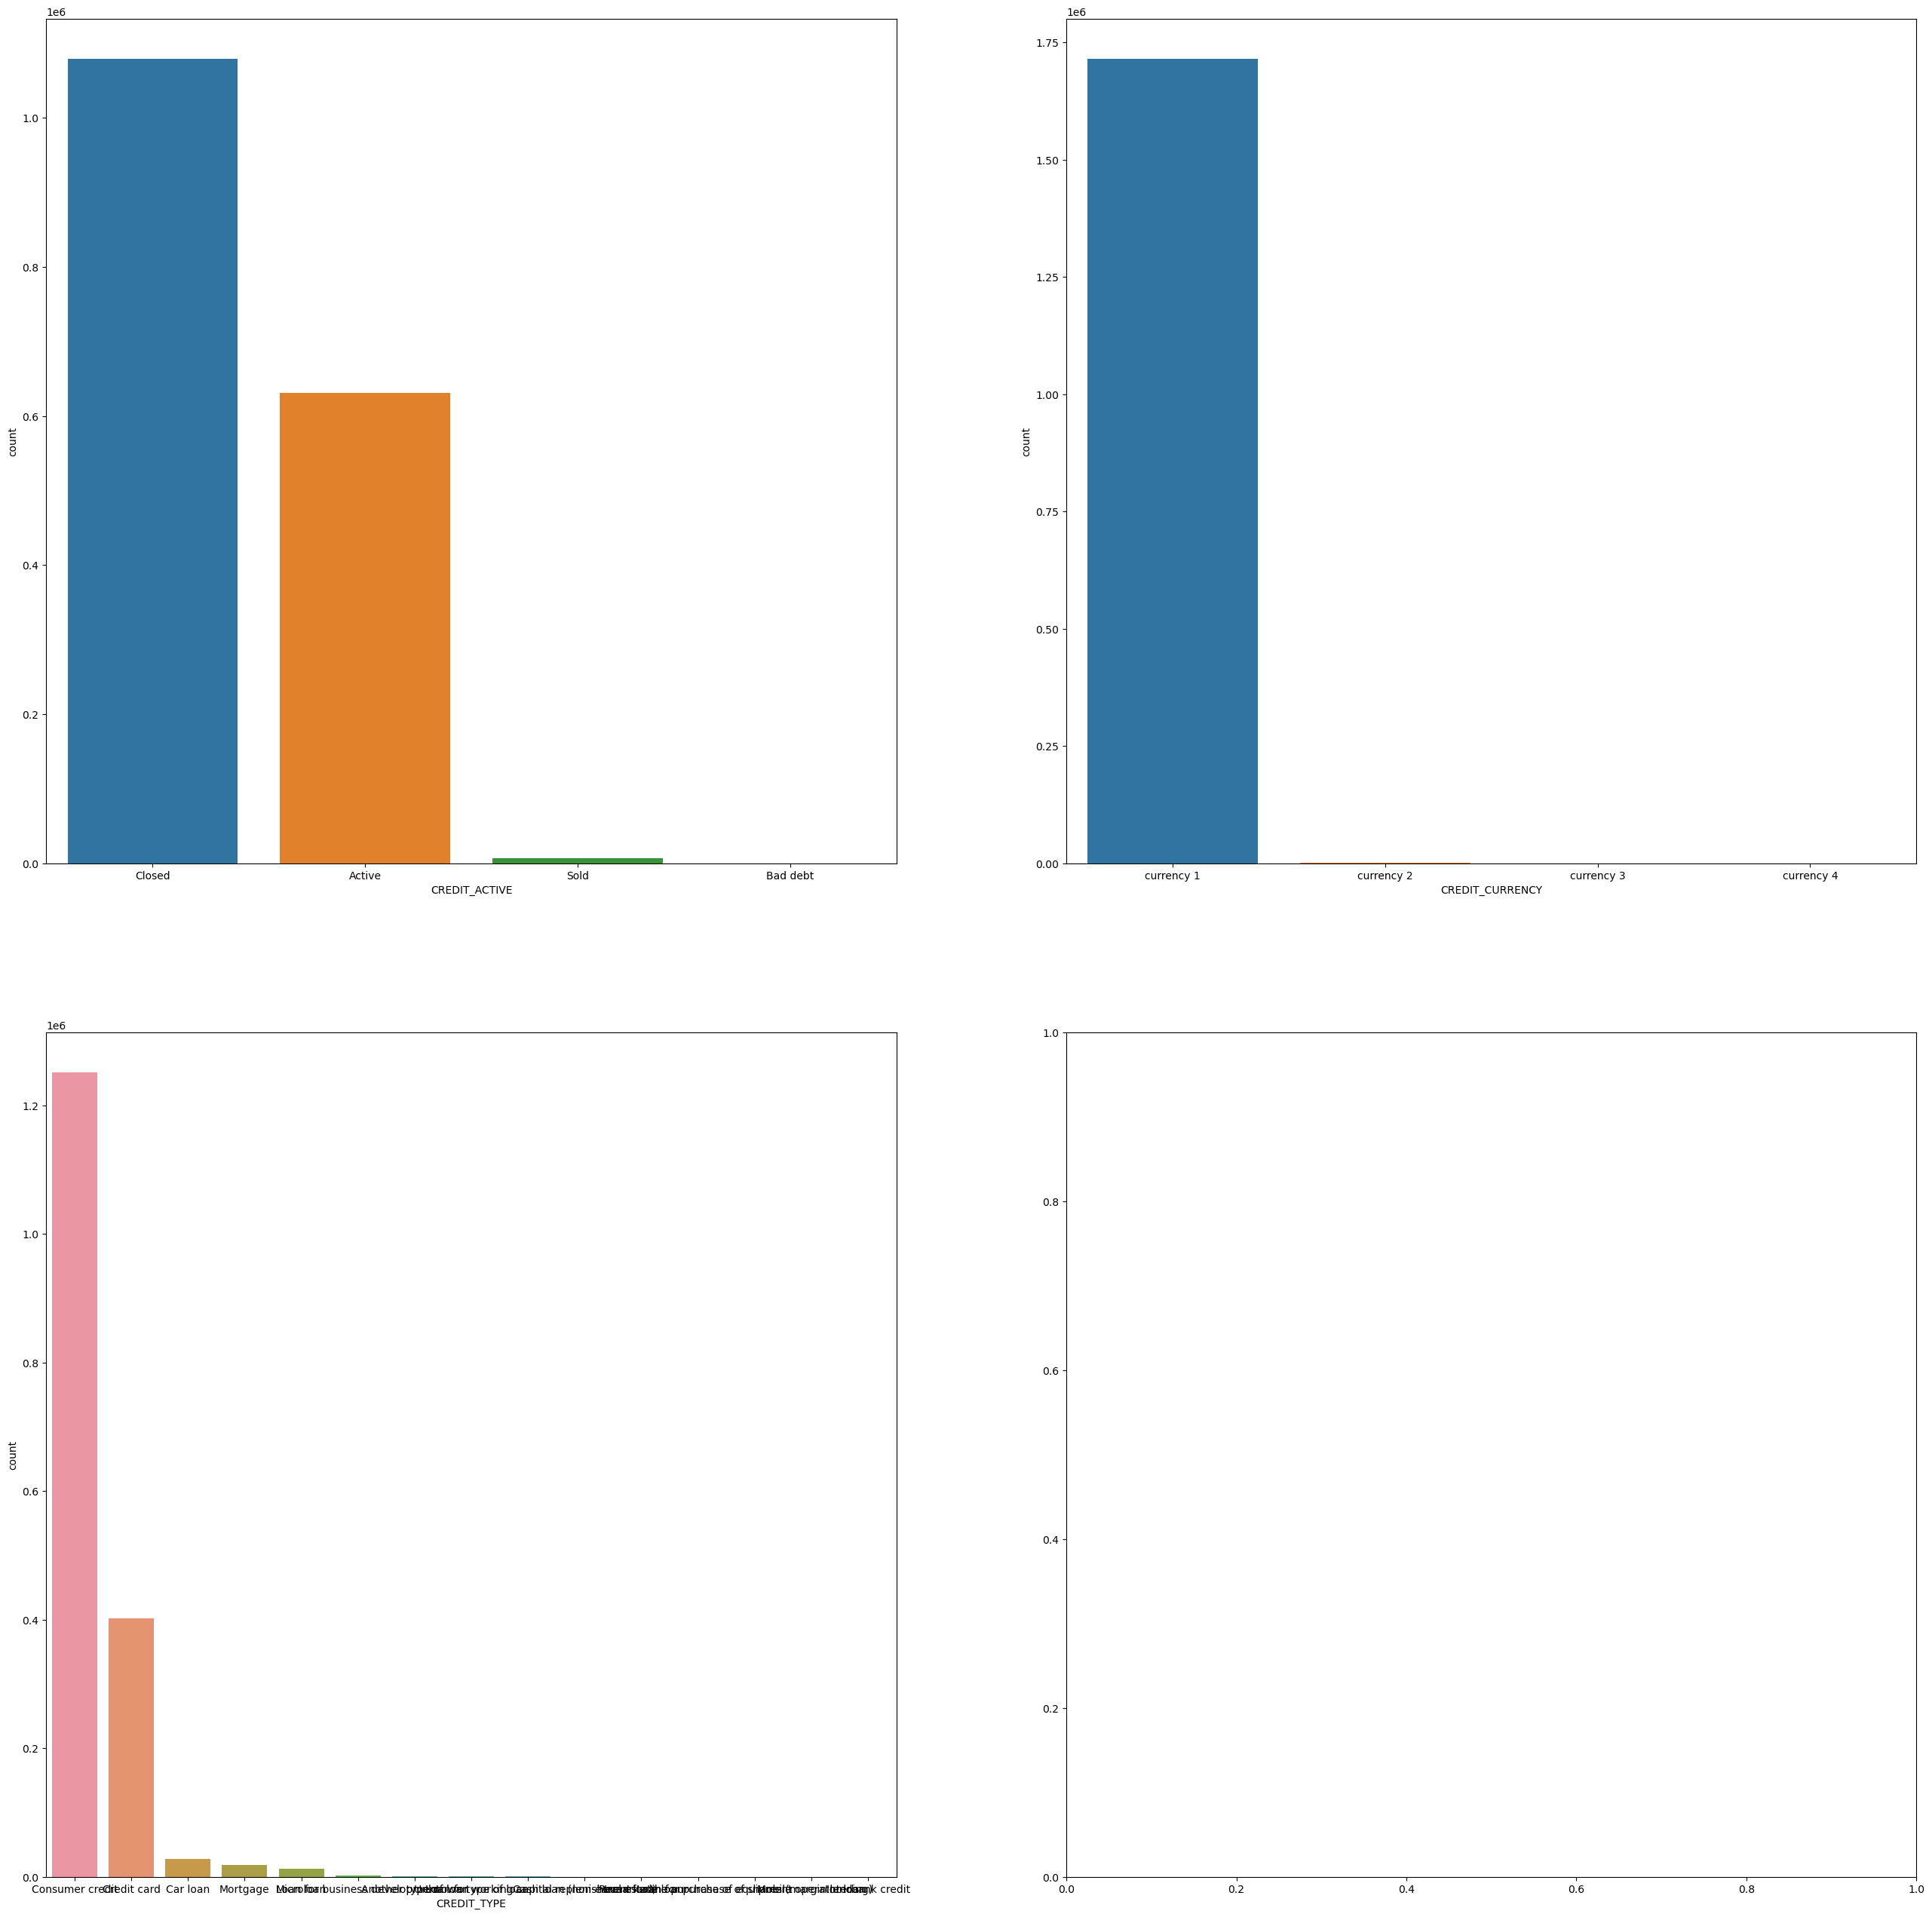

In [6]:
cat_low_val_num_var = ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

# create the figure and subplots
row_count=int(np.ceil(len(cat_low_val_num_var)/2))
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 32))

for i, axis in enumerate(fig.axes):
    # show in decending order if categoridal
    if bureau_data[cat_low_val_num_var[i]].dtype == 'O':
        sns.countplot(ax=axis, x = bureau_data[cat_low_val_num_var[i]], order=bureau_data[cat_low_val_num_var[i]].value_counts(ascending=False).index)
    else:
        sns.countplot(ax=axis, x = bureau_data[cat_low_val_num_var[i]])
    axis.set_xlabel(str(cat_low_val_num_var[i]))
    if i == len(cat_low_val_num_var)-1:
        break

# Show the plot
plt.show()

# EDA(Application Data) #

Observations:

Outliers is present in most of the numerical variables

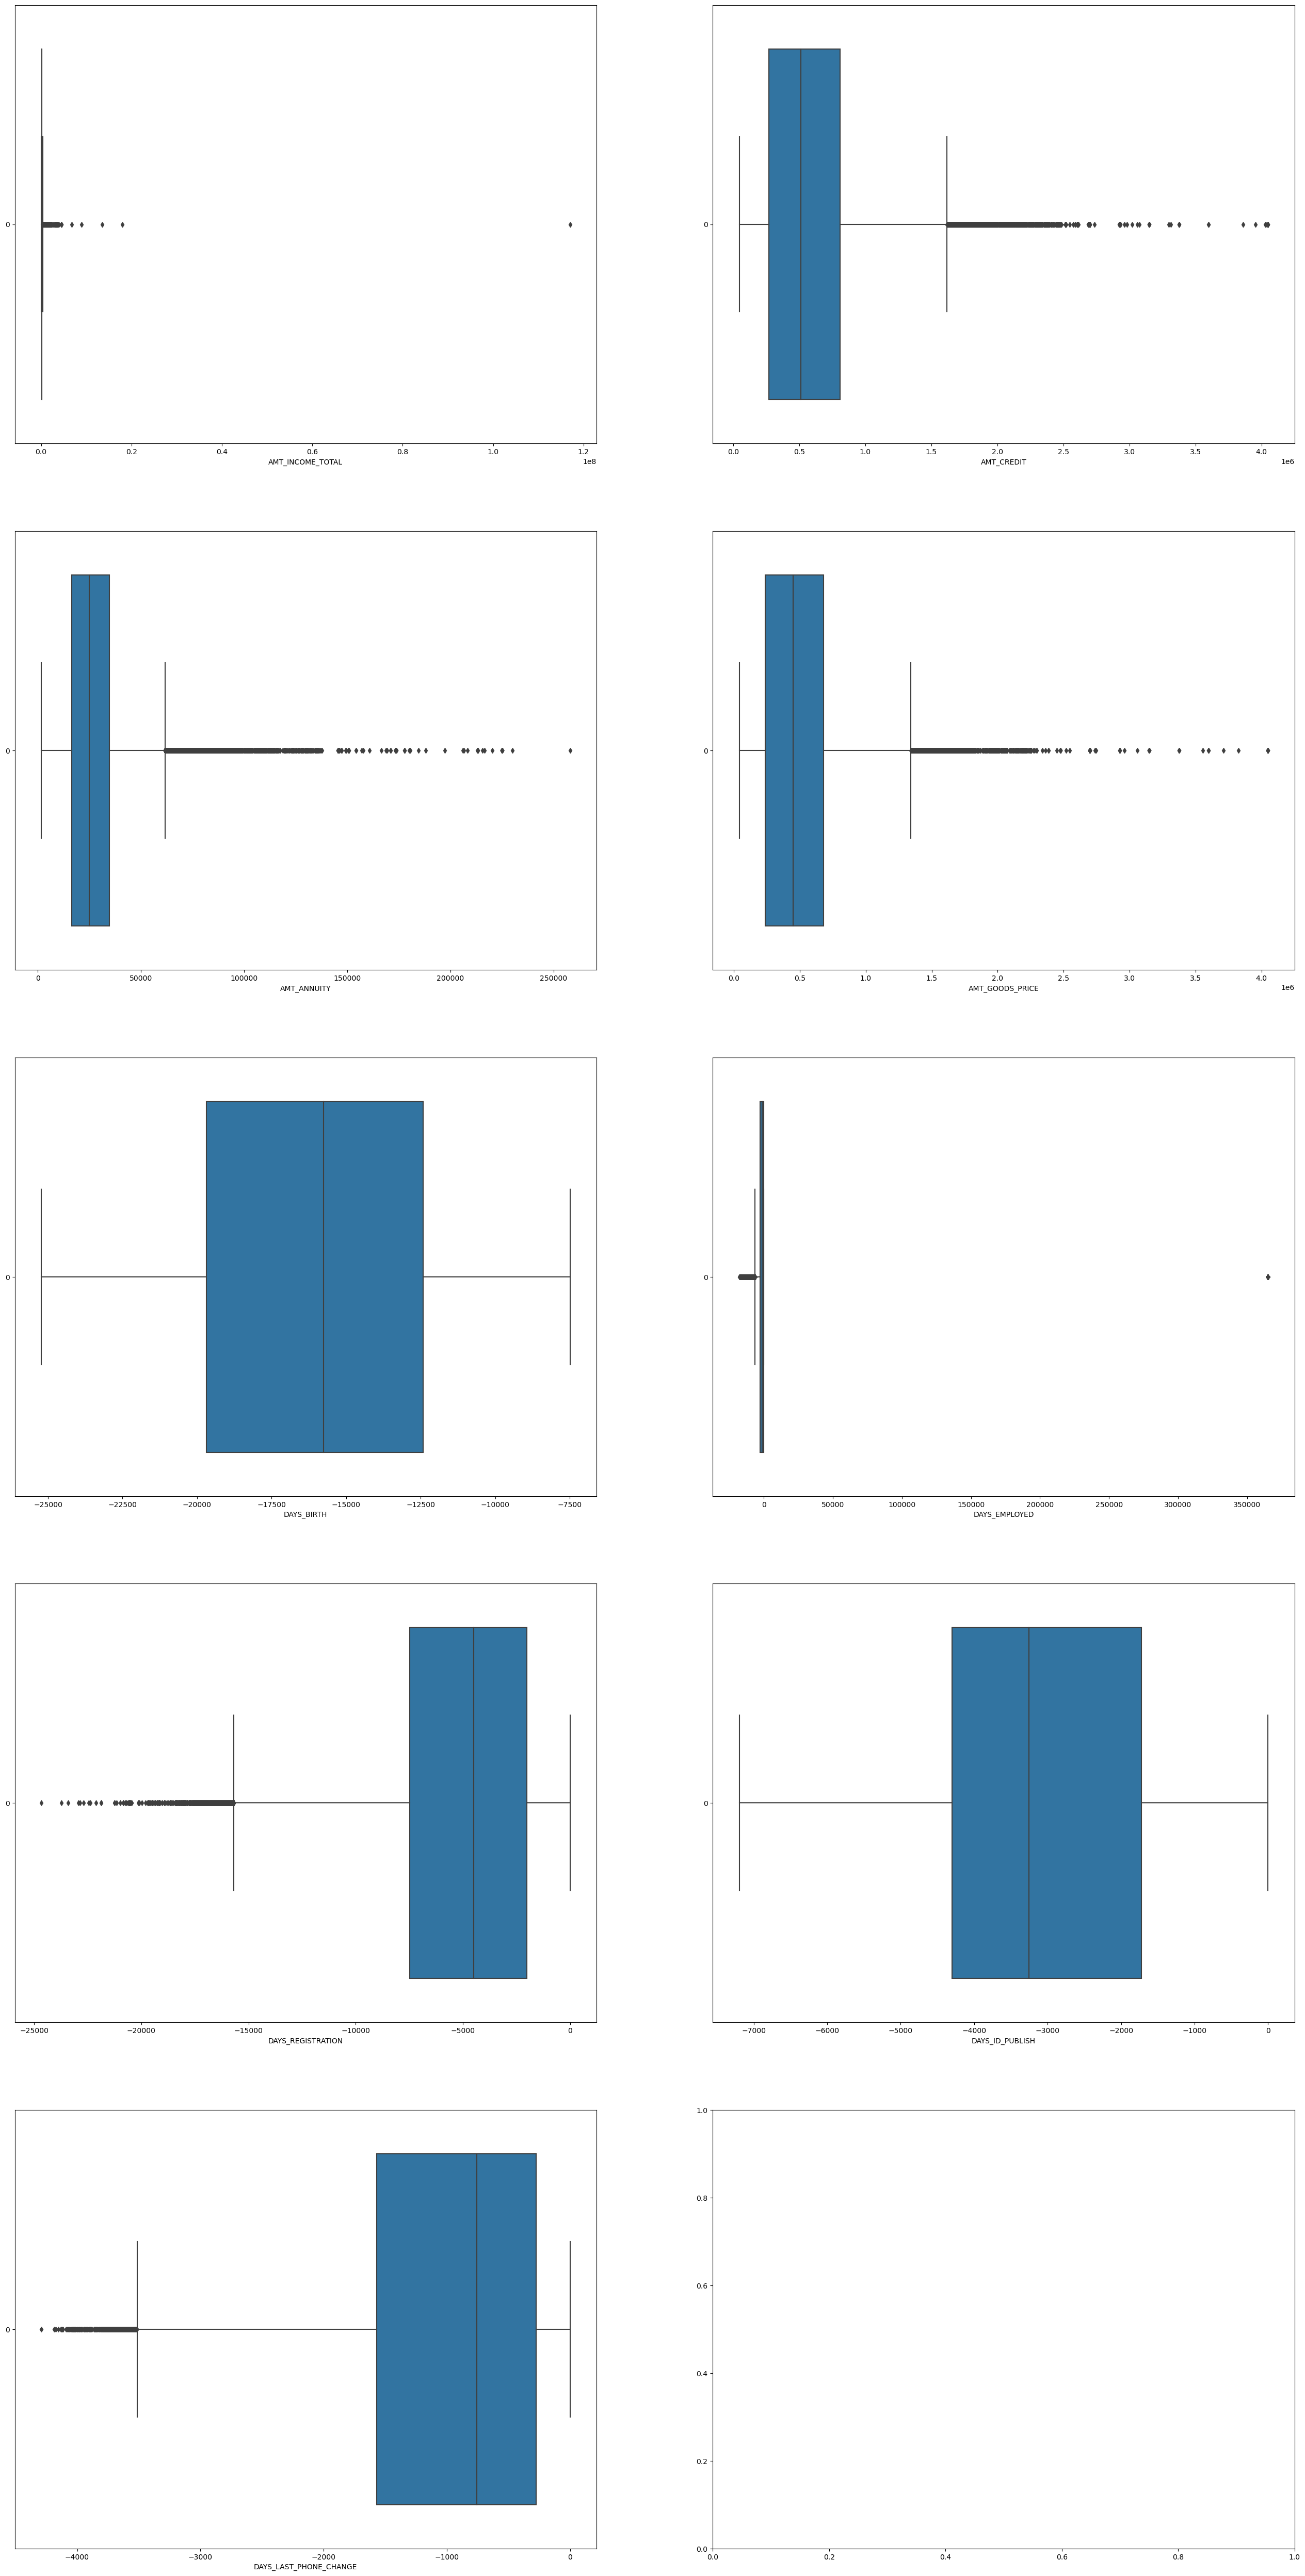

In [7]:
# create boxplots
large_val_numeric_var_app = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'
                            , 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
                            'DAYS_LAST_PHONE_CHANGE']

row_count=int(np.ceil(len(large_val_numeric_var_app)/2))

# create the figure and two subplots
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 64))

for i, axis in enumerate(fig.axes):
    sns.boxplot(ax=axis, data=app_data[large_val_numeric_var_app[i]],orient='h')
    axis.set_xlabel(str(large_val_numeric_var_app[i]))
    if i == len(large_val_numeric_var_app)-1:
        break

# Show the plot
plt.show()

# Data Pre-Processing (Bureau Data) #

As mentioned, our customer segment would be people who take personal loan and consumer credit fits the most as the credit type. 

In addition, Currency 1 is selected because it has the most data.

In [8]:
bureau_data_copy = bureau_data.copy()
bureau_data = bureau_data[(bureau_data['CREDIT_TYPE'] == 'Consumer credit') & # Our customer segment
                        (bureau_data['CREDIT_CURRENCY'] == 'currency 1') # Focus on 1 currency
                         ]

In [9]:
# Check Missing Columns % >50%
print("\nCHECK MISSING COLS %")
col_w_na = pd.DataFrame((bureau_data.isnull().sum().sort_values(ascending=False)/bureau_data.shape[0])).applymap("{0:.0%}".format)
print(col_w_na[col_w_na[0] > '50%'][0])


CHECK MISSING COLS %
AMT_ANNUITY               71%
AMT_CREDIT_MAX_OVERDUE    65%
Name: 0, dtype: object


C:\Users\William Lay\AppData\Local\Temp\ipykernel_24032\224035187.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  col_w_na = pd.DataFrame((bureau_data.isnull().sum().sort_values(ascending=False)/bureau_data.shape[0])).applymap("{0:.0%}".format)


**Drop variables with missing columns > 50%**

- AMT_ANNUITY
- AMT_CREDIT_MAX_OVERDUE

In [10]:
# MISSING COL % >50% REMOVAL
bureau_data = bureau_data.drop(columns=['AMT_ANNUITY', 'AMT_CREDIT_MAX_OVERDUE'])

**One Hot Encoding**

In [11]:
#HOT ENCODING OF CREDIT ACTIVE (bureau_data['CREDIT_ACTIVE'].unique() -> array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object))
bureau_data = pd.get_dummies(bureau_data,columns=['CREDIT_ACTIVE'])
bureau_data

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold
0,215354,5714462,currency 1,-497,0,-153.0,-153.0,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,False,False,True,False
2,215354,5714464,currency 1,-203,0,528.0,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,True,False,False,False
4,215354,5714466,currency 1,-629,0,1197.0,NaN,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,True,False,False,False
6,215354,5714468,currency 1,-43,0,79.0,NaN,0,42103.80,42103.8,0.0,0.0,Consumer credit,-22,True,False,False,False
7,162297,5714469,currency 1,-1896,0,-1684.0,-1710.0,0,76878.45,0.0,0.0,0.0,Consumer credit,-1710,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716420,352790,5057725,currency 1,-99,0,-83.0,-98.0,0,27000.00,0.0,0.0,0.0,Consumer credit,-18,False,False,True,False
1716421,375755,5057734,currency 1,-1335,0,-1152.0,-1152.0,0,195408.00,0.0,NaN,0.0,Consumer credit,-1139,False,False,True,False
1716424,100044,5057754,currency 1,-2648,0,-2433.0,-2493.0,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,False,False,True,False
1716425,100044,5057762,currency 1,-1809,0,-1628.0,-970.0,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,False,False,True,False


Notes: Outlier's value will not be replaced because the bins will be able to handle it later in WOE binning

**Correlation**

Next, we wanted to check the correlation and drop highly correlated variables.

The highly correlated (>0.7) features are:

DAYS_CREDIT - DAYS_CREDIT_UPDATE, DAYS_ENDDDATE_FACT, DAYS_CREDIT_ENDDATE
DAYS_CREDIT_ENDDATE - DAYS_ENDDATE_FACT,DAYS_CREDIT_UPDATE
DAYS_ENDDATE_FACT - DAYS_CREDIT_UPDATE

We decided to only keep DAYS_CREDIT

<Axes: >

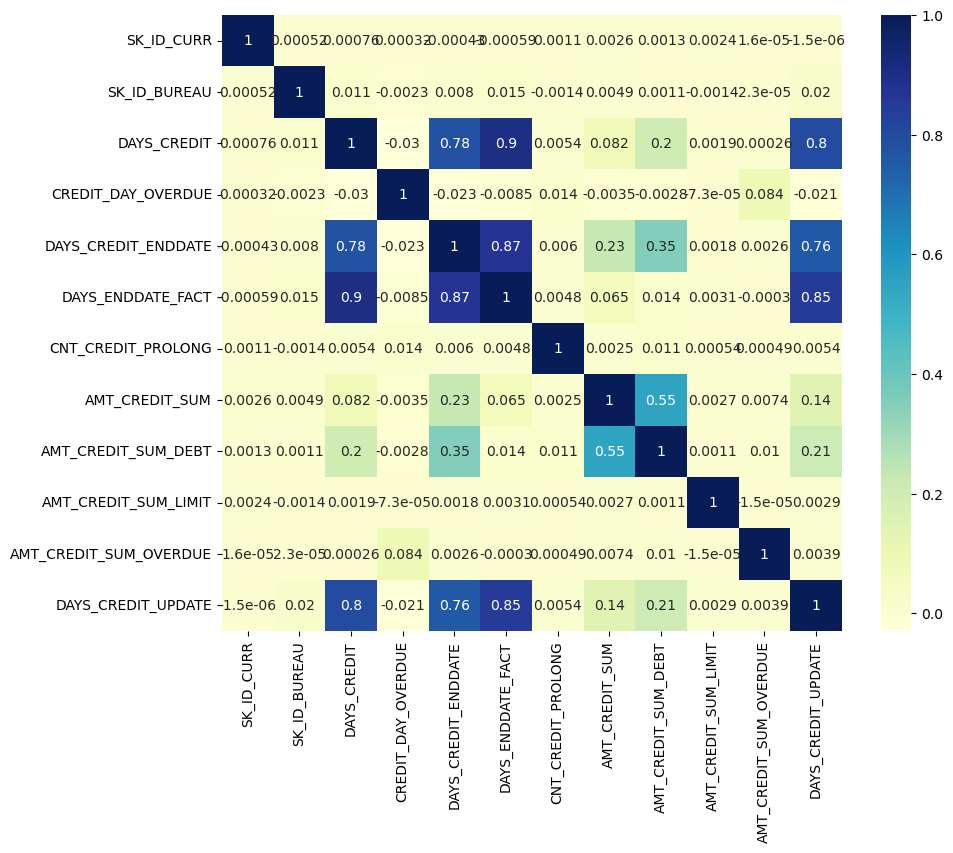

In [12]:
# get categorical and numerical columns
numerical_cols = bureau_data.select_dtypes(include=['int','float']).columns

categorical_cols= bureau_data.select_dtypes(include='object').columns

# check correlation
cor = bureau_data[bureau_data.select_dtypes(include=['int','float']).columns].corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True,cmap="YlGnBu", ax=ax)

In [13]:
# will only keep DAYS_CREDIT
bureau_data=bureau_data.drop(columns=['DAYS_CREDIT_UPDATE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT'])

**Feature Extraction**

For feature selection, we removed the columns that we no longer need i.e 'CREDIT_CURRENCY', 'CREDIT_TYPE', 'SK_ID_BUREAU'

In [14]:
bureau_data = bureau_data.drop(columns=['CREDIT_CURRENCY', 'CREDIT_TYPE', 'SK_ID_BUREAU'])
bureau_data.columns

Index(['SK_ID_CURR', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_ACTIVE_Active',
       'CREDIT_ACTIVE_Bad debt', 'CREDIT_ACTIVE_Closed', 'CREDIT_ACTIVE_Sold'],
      dtype='object')

Next, we want to make SK_ID unique to make it easier for us to merge bureau data with application data.

For the following numerical variables: 
- 'CREDIT_DAY_OVERDUE', 
- 'AMT_CREDIT_SUM_OVERDUE', 
- 'AMT_CREDIT_SUM_DEBT', 
- 'AMT_CREDIT_SUM', 
- 'DAYS_CREDIT', 
- 'AMT_CREDIT_SUM_LIMIT'
We decided to group by SK_ID and get the mean of each variables.

For the following categorical variables: 
- 'CNT_CREDIT_PROLONG', 
- 'CREDIT_ACTIVE_Active', 
- 'CREDIT_ACTIVE_Bad debt', 
- 'CREDIT_ACTIVE_Closed', 
- 'CREDIT_ACTIVE_Sold' 

We decided to group by SK_ID and get the sum of each variables.

In [15]:
# GROUPING OF DATA BY SKID

# Get MEAN -> CREDIT_DAY_OVERDUE, AMT_CREDIT_SUM_OVERDUE, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM, DAYS_CREDIT, AMT_CREDIT_SUM_LIMIT
mean_cols = ['CREDIT_DAY_OVERDUE', 'AMT_CREDIT_SUM_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM', 'DAYS_CREDIT', 'AMT_CREDIT_SUM_LIMIT']
mean_df = bureau_data.groupby(['SK_ID_CURR'])[mean_cols].mean()
mean_df

# Get SUM -> CNT_CREDIT_PROLONG, 'CREDIT_ACTIVE_Active', 'CREDIT_ACTIVE_Bad debt', 'CREDIT_ACTIVE_Closed', 'CREDIT_ACTIVE_Sold'
bool_cols = ['CREDIT_ACTIVE_Active', 'CREDIT_ACTIVE_Bad debt', 'CREDIT_ACTIVE_Closed', 'CREDIT_ACTIVE_Sold'] # convert to int first
for i in bool_cols:
    bureau_data[i] = bureau_data[i].astype(int)

sum_cols = ['CNT_CREDIT_PROLONG', 'CREDIT_ACTIVE_Active', 'CREDIT_ACTIVE_Bad debt', 'CREDIT_ACTIVE_Closed', 'CREDIT_ACTIVE_Sold']
sum_df = bureau_data.groupby(['SK_ID_CURR'])[sum_cols].sum()

# MERGE ALL DF
merged_df_bureau = mean_df.merge(sum_df, on='SK_ID_CURR', how='left').reset_index()
merged_df_bureau

,SK_ID_CURR,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_OVERDUE,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM,DAYS_CREDIT,AMT_CREDIT_SUM_LIMIT,CNT_CREDIT_PROLONG,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold
0,100001,0.0,0.0,85240.928571,2.076236e+05,-735.000000,0.0,0,3,0,4,0
1,100002,0.0,0.0,81927.000000,1.812015e+05,-1061.250000,0.0,0,1,0,3,0
2,100003,0.0,0.0,0.000000,4.745025e+04,-1680.500000,0.0,0,0,0,2,0
3,100004,0.0,0.0,0.000000,9.451890e+04,-867.000000,0.0,0,0,0,2,0
4,100005,0.0,0.0,284204.250000,2.993130e+05,-99.500000,0.0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
286627,456249,0.0,0.0,0.000000,2.454287e+05,-1777.111111,0.0,0,0,0,9,0
286628,456250,0.0,0.0,920154.240000,1.318230e+06,-881.000000,0.0,0,1,0,1,0
286629,456253,0.0,0.0,541599.000000,1.200000e+06,-850.333333,0.0,0,1,0,2,0
286630,456254,0.0,0.0,0.000000,4.500000e+04,-1104.000000,NaN,0,0,0,1,0


# Data Processing (Application Data) #

We processed application data with the following steps:

- Converted DAYS_BIRTH to a new variable, AGE for readability
- Filtered out AGE to be 40-44 which is our target customer segment
- Changed impossible outlier value for DAYS_EMPLOYED to Nan
- Dropped the column 'CODE_GENDER' as it can be discriminatory to include in our scorecard

In [16]:
#READ APPLICATION DATA AND FILTER 40-44yo
application_data = pd.read_csv('IS453 Group Assignment - Application Data.csv')
application_data['AGE'] = -application_data['DAYS_BIRTH']/365
application_data = application_data.drop(columns=['DAYS_BIRTH'])

filtered_data = application_data[ (application_data['AGE'] >= 40) & (application_data['AGE'] <= 44) ]
filtered_data_copy = filtered_data.copy()
filtered_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
count,33618.000000,33618.000000,33618.000000,3.361800e+04,3.361800e+04,33617.000000,3.359200e+04,33618.000000,33618.000000,33618.000000,...,33618.000000,33618.000000,33618.000000,29958.000000,29958.000000,29958.00000,29958.000000,29958.000000,29958.000000,33618.000000
mean,278838.859896,0.077875,0.613689,1.814361e+05,6.464533e+05,28712.461701,5.810982e+05,0.020856,2680.070022,-4598.411089,...,0.000982,0.000773,0.000089,0.005908,0.005942,0.03298,0.293711,0.260398,1.873323,41.982912
std,102965.902925,0.267979,0.799611,1.442099e+05,4.120727e+05,14818.889256,3.798420e+05,0.013842,43735.642895,3012.870185,...,0.031316,0.027800,0.009446,0.079209,0.104149,0.19690,0.980816,0.602695,1.821106,1.158094
min,100025.000000,0.000000,0.000000,2.655000e+04,4.500000e+04,2929.500000,4.500000e+04,0.000533,-9501.000000,-16032.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,40.000000
25%,189347.750000,0.000000,0.000000,1.125000e+05,3.127680e+05,17973.000000,2.700000e+05,0.010006,-3606.000000,-7276.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,40.972603
50%,279877.500000,0.000000,0.000000,1.575000e+05,5.450400e+05,26446.500000,4.635000e+05,0.018850,-1902.000000,-4292.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,41.969863
75%,367645.500000,0.000000,1.000000,2.250000e+05,9.000000e+05,36459.000000,7.650000e+05,0.028663,-855.000000,-1944.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,42.986301
max,456253.000000,1.000000,14.000000,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,365243.000000,0.000000,...,1.000000,1.000000,1.000000,3.000000,6.000000,7.00000,19.000000,8.000000,23.000000,44.000000


In [17]:
# CHANGED OUTLIER VALUE FOR DAYS_EMPLOYED to NAN
filtered_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# DROP IRRELEVANT COLUMNS
columns_to_drop = ['CODE_GENDER']
print("\nCOLUMNS DROPPED:", columns_to_drop)
filtered_data.drop(columns=columns_to_drop, inplace=True)

print("\nProcessed Application Data:")
filtered_data.describe(include = 'all')

C:\Users\William Lay\AppData\Local\Temp\ipykernel_24032\428406754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
C:\Users\William Lay\AppData\Local\Temp\ipykernel_24032\428406754.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns=columns_to_drop, inplace=True)



COLUMNS DROPPED: ['CODE_GENDER']

Processed Application Data:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
count,33618.000000,33618.000000,33618,33618,33618,33618.000000,3.361800e+04,3.361800e+04,33617.000000,3.359200e+04,...,33618.000000,33618.000000,33618.000000,29958.000000,29958.000000,29958.00000,29958.000000,29958.000000,29958.000000,33618.000000
unique,NaN,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,N,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,30415,20366,22941,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278838.859896,0.077875,NaN,NaN,NaN,0.613689,1.814361e+05,6.464533e+05,28712.461701,5.810982e+05,...,0.000982,0.000773,0.000089,0.005908,0.005942,0.03298,0.293711,0.260398,1.873323,41.982912
std,102965.902925,0.267979,NaN,NaN,NaN,0.799611,1.442099e+05,4.120727e+05,14818.889256,3.798420e+05,...,0.031316,0.027800,0.009446,0.079209,0.104149,0.19690,0.980816,0.602695,1.821106,1.158094
min,100025.000000,0.000000,NaN,NaN,NaN,0.000000,2.655000e+04,4.500000e+04,2929.500000,4.500000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,40.000000
25%,189347.750000,0.000000,NaN,NaN,NaN,0.000000,1.125000e+05,3.127680e+05,17973.000000,2.700000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,40.972603
50%,279877.500000,0.000000,NaN,NaN,NaN,0.000000,1.575000e+05,5.450400e+05,26446.500000,4.635000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,41.969863
75%,367645.500000,0.000000,NaN,NaN,NaN,1.000000,2.250000e+05,9.000000e+05,36459.000000,7.650000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,42.986301


**Correlation**

Remove variables with high correlation rates and keeping only one for each

In [18]:
print('Variables with the highest correlation:')
numeric_columns = filtered_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_columns.corr()
corr_matrix_top = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
corr_table = corr_matrix_top.stack()
# Filter correlations greater than 0.7
corr_table_gt_0_7 = corr_table.loc[lambda x: x > 0.7]
print(corr_table_gt_0_7[:60])

Variables with the highest correlation:
CNT_CHILDREN                 CNT_FAM_MEMBERS                 0.904668
AMT_CREDIT                   AMT_ANNUITY                     0.751924
                             AMT_GOODS_PRICE                 0.985683
AMT_ANNUITY                  AMT_GOODS_PRICE                 0.757032
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY     0.945399
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION     0.887854
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY         0.868382
APARTMENTS_AVG               ELEVATORS_AVG                   0.831115
                             LIVINGAPARTMENTS_AVG            0.940546
                             LIVINGAREA_AVG                  0.908002
                             APARTMENTS_MODE                 0.969168
                             ELEVATORS_MODE                  0.815021
                             LIVINGAPARTMENTS_MODE           0.923592
                             LIVINGAREA_MODE      

In [19]:
columns_to_remove = [
                    # due to high correlation
                    'CNT_CHILDREN',
                    'AMT_ANNUITY',
                    'AMT_GOODS_PRICE',
                    'REGION_RATING_CLIENT_W_CITY',
                    'LIVE_REGION_NOT_WORK_REGION',
                    'LIVE_CITY_NOT_WORK_CITY',
                    'APARTMENTS_MODE',
                    'ELEVATORS_MODE',
                    'LIVINGAPARTMENTS_MODE',
                    'LIVINGAREA_MODE',
                    'APARTMENTS_MEDI',
                    'ELEVATORS_MEDI',
                    'LIVINGAPARTMENTS_MEDI',
                    'LIVINGAREA_MEDI',
                    'TOTALAREA_MODE',
                    'BASEMENTAREA_MODE',
                    'BASEMENTAREA_MEDI',
                    'YEARS_BEGINEXPLUATATION_MODE',
                    'YEARS_BEGINEXPLUATATION_MEDI',
                    'YEARS_BUILD_MODE',
                    'YEARS_BUILD_MEDI',
                    'COMMONAREA_MODE',
                    'COMMONAREA_MEDI',
                    'ENTRANCES_MODE',
                    'ENTRANCES_MEDI',
                    'FLOORSMIN_AVG',
                    'FLOORSMAX_MODE',
                    'FLOORSMIN_MODE',
                    'FLOORSMAX_MEDI',
                    'FLOORSMIN_MEDI',
                    'LANDAREA_MODE',
                    'LANDAREA_MEDI'
]

filtered_data = filtered_data.drop(columns=columns_to_remove)
filtered_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
21,100025,0,Cash loans,Y,Y,202500.0,1132573.5,Unaccompanied,Commercial associate,Secondary / secondary special,...,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,40.589041
27,100032,0,Cash loans,N,Y,112500.0,327024.0,Family,Working,Secondary / secondary special,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,43.693151
30,100035,0,Cash loans,N,Y,292500.0,665892.0,Unaccompanied,Commercial associate,Secondary / secondary special,...,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,41.863014
34,100040,0,Cash loans,N,Y,135000.0,1125000.0,Unaccompanied,State servant,Higher education,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,43.827397
67,100079,0,Revolving loans,N,Y,225000.0,270000.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,42.079452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307454,456193,0,Cash loans,N,N,157500.0,1332000.0,Unaccompanied,Working,Higher education,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,42.608219
307458,456197,0,Cash loans,N,Y,112500.0,239850.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,41.189041
307486,456230,0,Cash loans,Y,Y,292500.0,355536.0,Unaccompanied,Commercial associate,Higher education,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,43.863014
307494,456238,0,Cash loans,Y,N,270000.0,479700.0,Family,Commercial associate,Secondary / secondary special,...,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,40.980822


**Merged Cleaned Application Data and Cleaned Bureau Data**

In [20]:
merged_df1 = pd.merge(filtered_data, merged_df_bureau, on='SK_ID_CURR', how='left')
merged_df2 = merged_df1.copy()

# Merged Data #

After merging bureau and application data using left join on SK_ID_CURR, we removed 10% of total rows missing more than 25 values.

In [21]:
# REMOVING MISSING VALUES ROWS >25
# threshold = 25
threshold = 25
print(f"\nREMOVING MISSING VALUES ROWS > {threshold}: ")
rows_w_gt_3_na = merged_df2[merged_df2.isnull().sum(axis=1) > threshold].shape[0]
print(f'Percent of total rows missing more than {threshold} values: ' + str("{:.1%}".format(rows_w_gt_3_na/merged_df2.shape[0])))
merged_df2 = merged_df2.dropna(thresh=merged_df2.shape[1]-threshold)
print("Starting row count: " + str(merged_df1.shape[0]))
print("Ending row count: " + str(merged_df2.shape[0]))
print("Percent dropped: " + "{:.2%}".format(1-merged_df2.shape[0]/merged_df1.shape[0]))

#double check id is unique
merged_df2 = merged_df2.drop(columns=['SK_ID_CURR'])
merged_df2


REMOVING MISSING VALUES ROWS > 25: 
Percent of total rows missing more than 25 values: 9.7%
Starting row count: 33618
Ending row count: 30354
Percent dropped: 9.71%


,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,AMT_CREDIT_SUM_OVERDUE,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM,DAYS_CREDIT,AMT_CREDIT_SUM_LIMIT,CNT_CREDIT_PROLONG,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold
0,0,Cash loans,Y,Y,202500.0,1132573.5,Unaccompanied,Commercial associate,Secondary / secondary special,Married,...,0.0000,1.886544e+06,2.452500e+06,-700.000000,0.0,0.0,1.0,0.0,0.0,0.0
1,0,Cash loans,N,Y,112500.0,327024.0,Family,Working,Secondary / secondary special,Married,...,0.0000,0.000000e+00,3.177900e+05,-1071.000000,0.0,0.0,1.0,0.0,3.0,0.0
2,0,Cash loans,N,Y,292500.0,665892.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,...,0.0000,4.624155e+05,4.978476e+05,-1439.500000,0.0,0.0,3.0,0.0,3.0,0.0
3,0,Cash loans,N,Y,135000.0,1125000.0,Unaccompanied,State servant,Higher education,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Revolving loans,N,Y,225000.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Separated,...,0.0000,0.000000e+00,6.078150e+04,-553.000000,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33613,0,Cash loans,N,N,157500.0,1332000.0,Unaccompanied,Working,Higher education,Civil marriage,...,0.0000,1.532596e+05,3.641929e+05,-742.000000,0.0,0.0,1.0,0.0,2.0,0.0
33614,0,Cash loans,N,Y,112500.0,239850.0,Unaccompanied,Working,Secondary / secondary special,Married,...,0.0000,0.000000e+00,5.762700e+04,-1326.285714,0.0,0.0,0.0,0.0,7.0,0.0
33615,0,Cash loans,Y,Y,292500.0,355536.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,...,26.4375,1.726843e+04,1.184991e+05,-1386.000000,0.0,0.0,1.0,0.0,7.0,0.0
33616,0,Cash loans,Y,N,270000.0,479700.0,Family,Commercial associate,Secondary / secondary special,Married,...,0.0000,8.907210e+04,1.769004e+05,-2314.800000,0.0,0.0,1.0,0.0,4.0,0.0


# Grouping and Screening #

**Finding IV of each charateristics or independent variable**

Notes: sc.woebin unable to encode ORGANIZATION_TYPE as too many unique cols so it is now grouped it into 5 main groups 
- Public Services
- Financial and Commerical Activities
- Infrasturcutre and Utilities
- Specialized Industries
- Miscellaneous

In [22]:
# after merging, want to find the IV of all the variables using sc package
# however, sc unable to encode ORGANIZATION_TYPE as too many unique cols so i grouped it into 5 main groups

merged_df2['ORGANIZATION_TYPE'].loc[merged_df2['ORGANIZATION_TYPE'].str.contains('Business Entity')] = 'Business Entity'
merged_df2['ORGANIZATION_TYPE'].loc[merged_df2['ORGANIZATION_TYPE'].str.contains('Industry')] = 'Industry'
merged_df2['ORGANIZATION_TYPE'].loc[merged_df2['ORGANIZATION_TYPE'].str.contains('Transport')] = 'Transport'
merged_df2['ORGANIZATION_TYPE'].loc[merged_df2['ORGANIZATION_TYPE'].str.contains('Trade')] = 'Trade'
merged_df2['ORGANIZATION_TYPE'].loc[merged_df2['ORGANIZATION_TYPE'].str.contains('University')] = 'Education'
merged_df2['ORGANIZATION_TYPE'].loc[merged_df2['ORGANIZATION_TYPE'].str.contains('Kindergarten')] = 'Education'
merged_df2['ORGANIZATION_TYPE'].loc[merged_df2['ORGANIZATION_TYPE'].str.contains('School')] = 'Education'
merged_df2['ORGANIZATION_TYPE'].loc[merged_df2['ORGANIZATION_TYPE'].str.contains('Security')] = 'Security'


# Public Services and Administration
govt = ['Military','Government','Police','Emergency', 'Education','Postal','Housing']
# Financial and Commercial Services
finance = ['Bank','Trade','Insurance','Legal Services','Realtor']
# Infrastructure and Utilities
transport_infrast = ['Transport','Construction','Electricity', 'Telecom']
# Specialized Industries and Services:
specialised = ['Medicine','Industry', 'Agriculture', 'Advertising' ,'Hotel', 'Restaurant', 'Cleaning','Culture']
# Independent and Miscellaneous Entities
misc = ['Self-employed','Services','Other', 'XNA','Mobile']


def change_org_type(group_list,new_group):
        for i in group_list:
                merged_df2['ORGANIZATION_TYPE'].loc[merged_df2['ORGANIZATION_TYPE'].str.contains(i)] = new_group

change_org_type(govt,'Public Services')
change_org_type(finance,'Financial and Commercial Services')
change_org_type(transport_infrast,'Infrastructure and Utilities')
change_org_type(specialised,'Specialized Industries')
change_org_type(misc,'Miscellaneous')

unique_values=merged_df2['ORGANIZATION_TYPE'].unique()
unique_values_list = list(unique_values)

print(unique_values_list)
for value in unique_values:
        print(value)

C:\Users\William Lay\AppData\Local\Temp\ipykernel_24032\2047483483.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2['ORGANIZATION_TYPE'].loc[merged_df2['ORGANIZATION_TYPE'].str.contains('Business Entity')] = 'Business Entity'
C:\Users\William Lay\AppData\Local\Temp\ipykernel_24032\2047483483.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2['ORGANIZATION_TYPE'].loc[merged_df2['ORGANIZATION_TYPE'].str.contains('Industry')] = 'Industry'
C:\Users\William Lay\AppData\Local\Temp\ipykernel_24032\2047483483.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

['Miscellaneous', 'Specialized Industries', 'Business Entity', 'Security', 'Infrastructure and Utilities', 'Religion']
Miscellaneous
Specialized Industries
Business Entity
Security
Infrastructure and Utilities
Religion


C:\Users\William Lay\AppData\Local\Temp\ipykernel_24032\2047483483.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2['ORGANIZATION_TYPE'].loc[merged_df2['ORGANIZATION_TYPE'].str.contains(i)] = new_group
C:\Users\William Lay\AppData\Local\Temp\ipykernel_24032\2047483483.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2['ORGANIZATION_TYPE'].loc[merged_df2['ORGANIZATION_TYPE'].str.contains(i)] = new_group
C:\Users\William Lay\AppData\Local\Temp\ipykernel_24032\2047483483.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

**IV**

In [23]:
# Getting the IV usin sc
IV_df = pd.DataFrame(columns=['Name', 'IV'])

bins = sc.woebin(merged_df2, y='TARGET') #check df
for variables , bindetails in bins.items():
    iv_value = bindetails['total_iv'].head(1).values[0]
    IV_df = pd.concat([IV_df, pd.DataFrame([{'Name': variables, 'IV': iv_value}])], ignore_index=True) # for pandas = 2.0

[INFO] creating woe binning ...


C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\condition_fun.py:34: UserWarning: There are 1 columns have only one unique values, which are removed from input dataset. 
 (ColumnNames: FLAG_MOBIL)
  warnings.warn("There are {} columns have only one unique values, which are removed from input dataset. \n (ColumnNames: {})".format(len(unique1_cols), ', '.join(unique1_cols)))
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:141: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  ).groupby(['variable', 'rowid', 'bin_chr'], group_keys=False).agg({'bad':sum,'good':sum})\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:141: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  ).groupby(['variable', 'rowid', 'bin_chr'], group_keys=False).agg({'bad':sum,'good':sum})\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided cal

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:446: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:447: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum, 'bin':lambda x:'%,%'.join(x)}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:447: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callabl

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:446: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:447: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum, 'bin':lambda x:'%,%'.join(x)}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:447: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callabl

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index().assign(bin=lambda x: x['bstbin'])\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided cal

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index().assign(bin=lambda x: x['bstbin'])\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided cal

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:446: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index().assign(bin=lambda x: x['bstbin'])\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided cal

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'su

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:161: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning = dtm.groupby(['variable','bin'], group_keys=False)['y'].agg([n0, n1])\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directl

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index().assign(bin=lambda x: x['bstbin'])\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided cal

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index().assign(bin=lambda x: x['bstbin'])\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided cal

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:141: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  ).groupby(['variable', 'rowid', 'bin_chr'], group_keys=False).agg({'bad':sum,'good':sum})\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:141: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  ).groupby(['variable', 'rowid', 'bin_chr'], group_keys=False).agg({'bad':sum,'good':sum})\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retai

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'su

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'su

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  init_bin = dtm.groupby('bin', group_keys=False)['y'].agg([n0, n1])\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep c

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:446: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:447: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum, 'bin':lambda x:'%,%'.join(x)}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:447: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callabl

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index().assign(bin=lambda x: x['bstbin'])\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided cal

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:141: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  ).groupby(['variable', 'rowid', 'bin_chr'], group_keys=False).agg({'bad':sum,'good':sum})\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:141: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  ).groupby(['variable', 'rowid', 'bin_chr'], group_keys=False).agg({'bad':sum,'good':sum})\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retai

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index().assign(bin=lambda x: x['bstbin'])\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided cal

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index().assign(bin=lambda x: x['bstbin'])\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided cal

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:446: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index().assign(bin=lambda x: x['bstbin'])\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided cal

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:141: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  ).groupby(['variable', 'rowid', 'bin_chr'], group_keys=False).agg({'bad':sum,'good':sum})\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:141: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  ).groupby(['variable', 'rowid', 'bin_chr'], group_keys=False).agg({'bad':sum,'good':sum})\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retai

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'su

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:413: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['variable', 'bstbin', 'value'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass '

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

Binning on 30354 rows and 95 columns in 00:00:46


C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:413: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['variable', 'bstbin', 'value'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass '

In [24]:
#Sort IV in descending order
sorted_IV_df = IV_df.sort_values(by='IV', ascending=False)
sorted_IV_df.head(30)

,Name,IV
66,AMT_CREDIT,0.078038
92,DAYS_CREDIT,0.075520
10,OCCUPATION_TYPE,0.069906
46,DAYS_LAST_PHONE_CHANGE,0.067718
85,DAYS_EMPLOYED,0.064615
23,NAME_EDUCATION_TYPE,0.058365
78,DAYS_ID_PUBLISH,0.045571
34,REGION_RATING_CLIENT,0.045004
90,OWN_CAR_AGE,0.040846
11,FLOORSMAX_AVG,0.040522


Based on this interpretation of IV of characteristics:
- <0.02		Not useful for prediction
- 0.02 to 0.1	Weak predictive power
- 0.1 to 0.3	Medium predictive power
- 0.3 to 0.5	Strong predictive power
- More than 0.5	Potentially over-predictive

In [25]:
#Finding medium predictor
sorted_IV_df[sorted_IV_df['IV']>0.1].head(20)

,Name,IV


In [26]:
#Finding weak predictor
sorted_IV_df[sorted_IV_df['IV']>0.02].head(20)

,Name,IV
66,AMT_CREDIT,0.078038
92,DAYS_CREDIT,0.075520
10,OCCUPATION_TYPE,0.069906
46,DAYS_LAST_PHONE_CHANGE,0.067718
85,DAYS_EMPLOYED,0.064615
23,NAME_EDUCATION_TYPE,0.058365
78,DAYS_ID_PUBLISH,0.045571
34,REGION_RATING_CLIENT,0.045004
90,OWN_CAR_AGE,0.040846
11,FLOORSMAX_AVG,0.040522


**Charateristics Screening**

We decied to categorise into the 5C and consider our business knowledge

https://cua.com/Home/Advice/CUAdvice/Five-Cs-of-Credit/#:~:text=The%20lender%20will%20typically%20follow,borrower%20with%20the%20requested%20funds.

Capital -> OWN_CAR_AGE

Character -> DAYS_CREDIT, OCCUPATION_TYPE, DAYS_LAST_PHONE_CHANGE

Capacity -> AMT_CREDIT_SUM_DEBT, AMT_INCOME_TOTAL, DAYS_EMPLOYED

Collateral -> FLOORSMAX_AVG, CREDIT_ACTIVE_Active

Conditions -> REGION_RATING_CLIENT, REGION_POPULATION_RELATIVE

In [27]:
selected_variables = [
                    'AMT_CREDIT',
                    'DAYS_CREDIT',
                    'OCCUPATION_TYPE',
                    'DAYS_LAST_PHONE_CHANGE',
                    'DAYS_EMPLOYED',
                    'NAME_EDUCATION_TYPE',
                    'DAYS_ID_PUBLISH',
                    'REGION_RATING_CLIENT',
                    'OWN_CAR_AGE',
                    'FLOORSMAX_AVG',
                    'CREDIT_ACTIVE_Active',
                    'NAME_INCOME_TYPE',
                    'AMT_CREDIT_SUM_DEBT',
                    'AMT_INCOME_TOTAL',
                    'REGION_POPULATION_RELATIVE'
                    ]

**EDA on the new dataset with 15 selected variables**

C:\Users\William Lay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\William Lay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\William Lay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\William Lay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


C:\Users\William Lay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\William Lay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\William Lay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\William Lay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


Text(0.5, 1.0, 'Distribution of Client with Payment Difficulties')

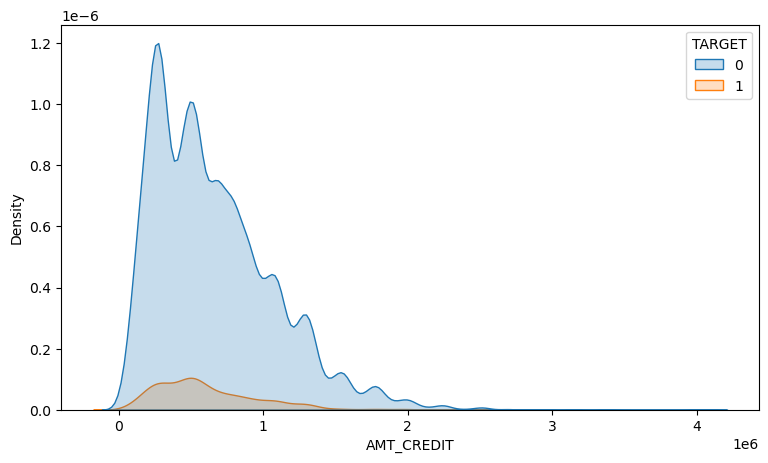

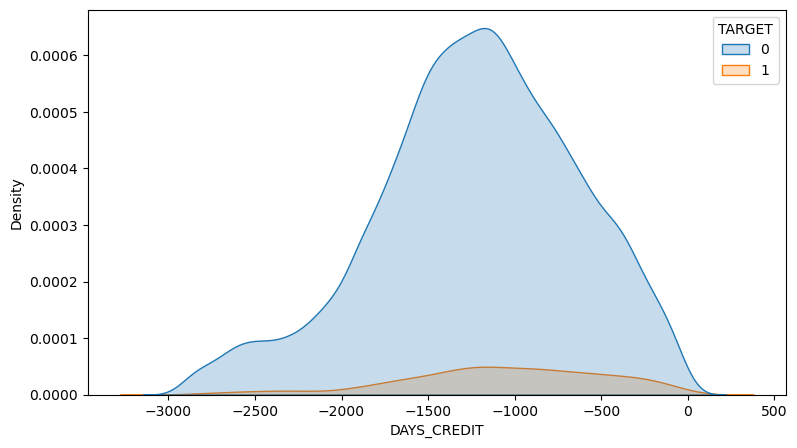

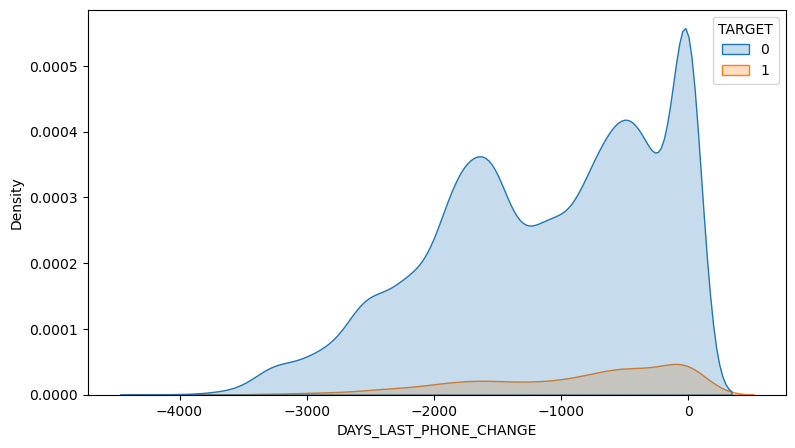

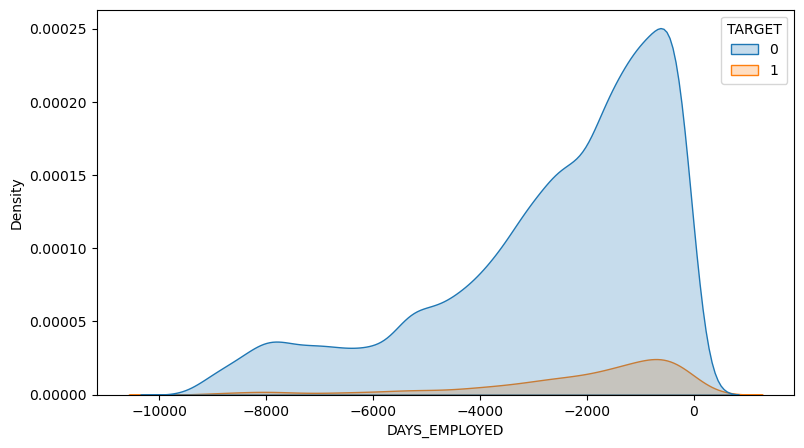

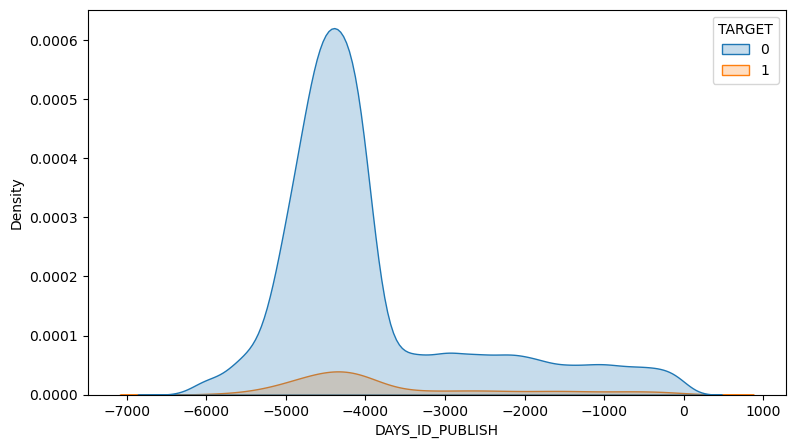

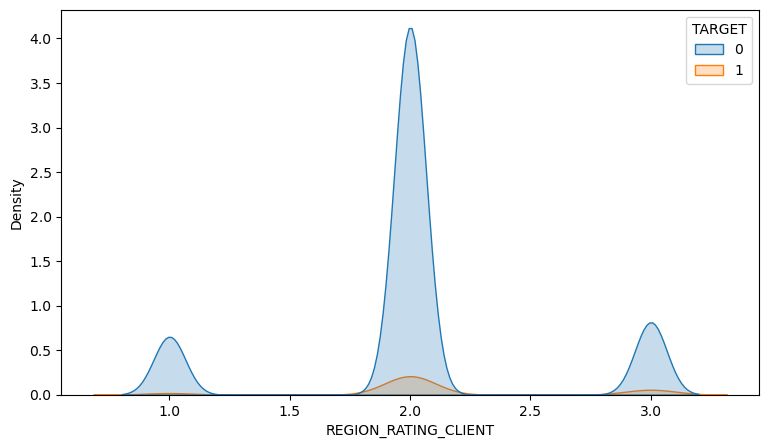

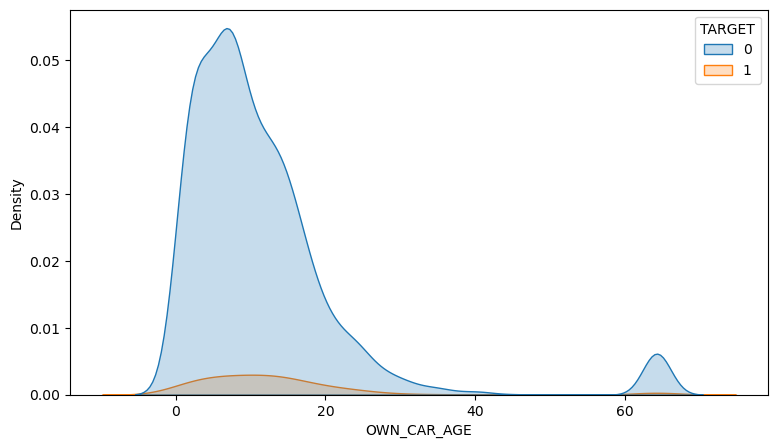

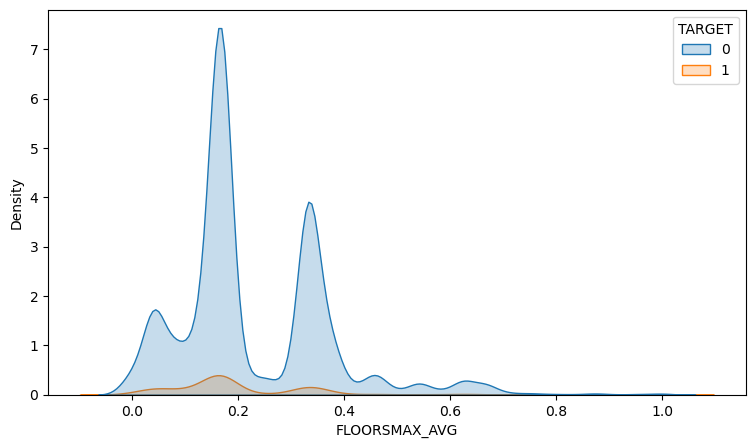

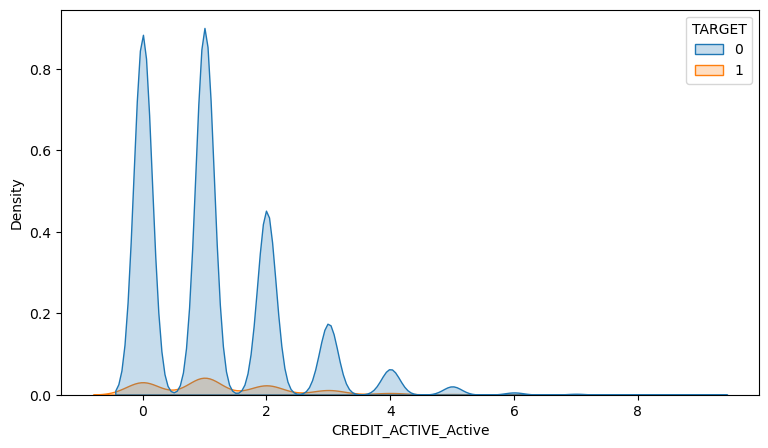

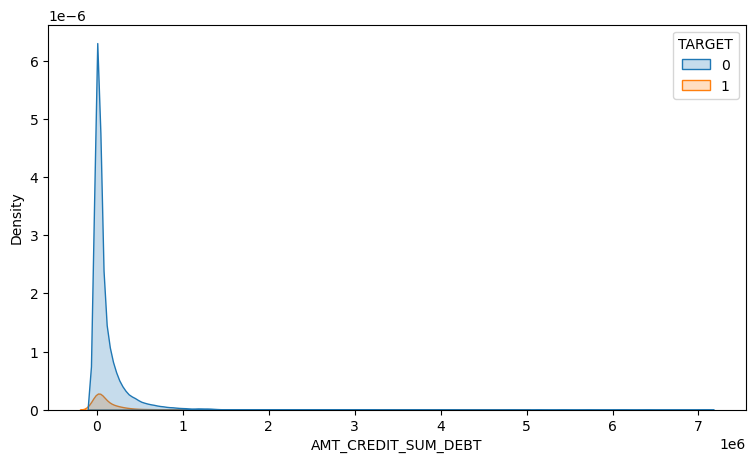

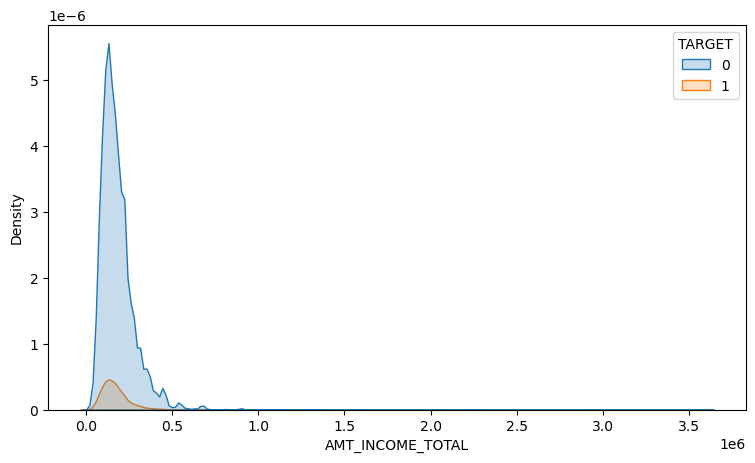

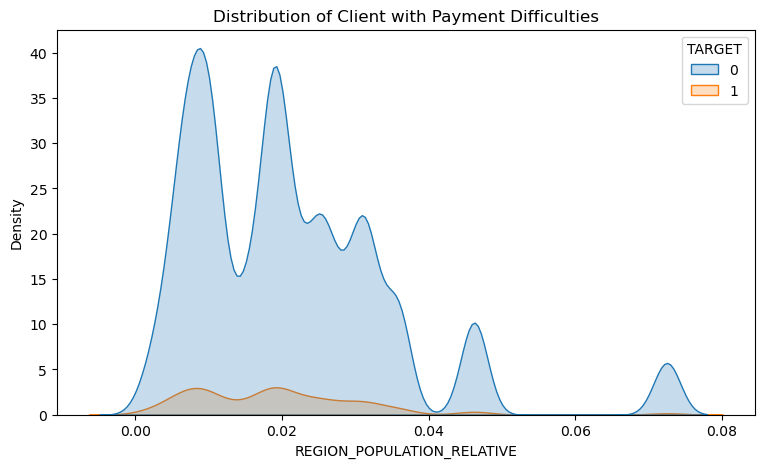

In [28]:
# Further KDA

merged_df3 = merged_df2.copy()
merged_df3 = merged_df3[selected_variables]
col_to_add = merged_df2['TARGET']
merged_df3.insert(0, 'TARGET', col_to_add)
# merged_df3
num_cols = merged_df3.select_dtypes(include=['int','float']).columns[1:]

for i, var in enumerate(num_cols):
    plt.figure(figsize=(9,5))
    sns.kdeplot(data=merged_df3, x=var, hue="TARGET", fill = True)
plt.title('Distribution of Client with Payment Difficulties')

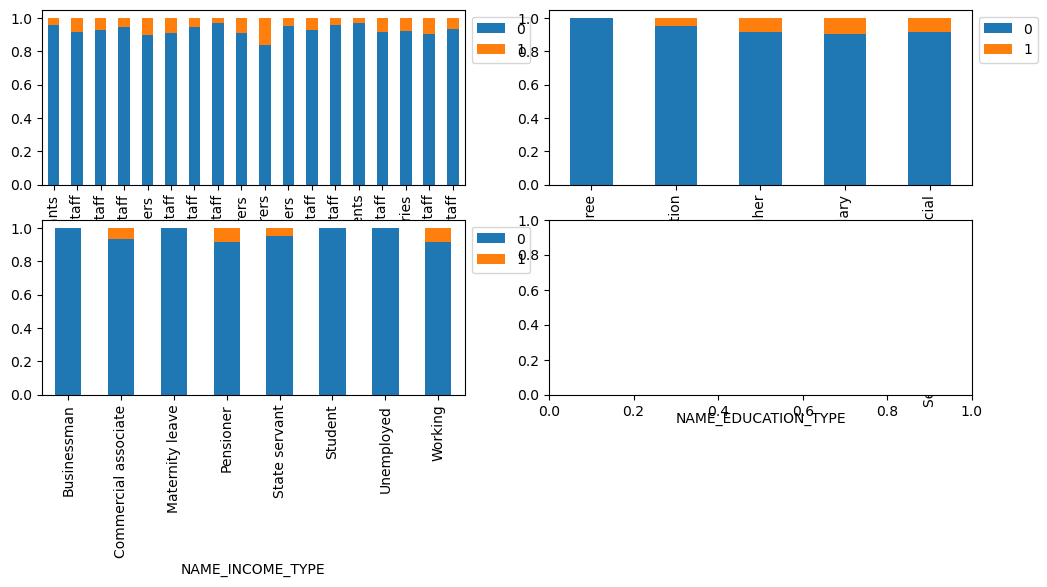

In [29]:
cat_low_val_num_var = merged_df3.select_dtypes(include=['object']).columns

# create the figure and subplots
row_count=int(np.ceil(len(cat_low_val_num_var)/2))
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(12, 5))

for i, axis in enumerate(fig.axes):
    df_bivariate = merged_df3.groupby(cat_low_val_num_var[i])['TARGET'].value_counts(normalize = True).unstack()
    df_bivariate.plot(ax=axis, kind='bar', stacked='True')
    axis.set_xlabel(str(cat_low_val_num_var[i]))
    axis.legend(bbox_to_anchor=(1.0, 1.0))
    if i == len(cat_low_val_num_var)-1: 
        break
    
# Show the plot
plt.show()

# Scorecard Generation #

In [30]:
merged_df3 = merged_df2.copy()
merged_df3 = merged_df3[selected_variables]
merged_df3

col_to_add = merged_df2['TARGET']
merged_df3.insert(0, 'TARGET', col_to_add)

# merged_df3['TARGET'].unique()
merged_df3

,TARGET,AMT_CREDIT,DAYS_CREDIT,OCCUPATION_TYPE,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,NAME_EDUCATION_TYPE,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,OWN_CAR_AGE,FLOORSMAX_AVG,CREDIT_ACTIVE_Active,NAME_INCOME_TYPE,AMT_CREDIT_SUM_DEBT,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE
0,0,1132573.5,-700.000000,Sales staff,0.0,-1652.0,Secondary / secondary special,-2299,2,14.0,NaN,1.0,Commercial associate,1.886544e+06,202500.0,0.025164
1,0,327024.0,-1071.000000,Laborers,-2.0,-1234.0,Secondary / secondary special,-3153,2,NaN,NaN,1.0,Working,0.000000e+00,112500.0,0.019101
2,0,665892.0,-1439.500000,NaN,-1634.0,-2668.0,Secondary / secondary special,-3787,2,NaN,0.0417,3.0,Commercial associate,4.624155e+05,292500.0,0.025164
3,0,1125000.0,NaN,Core staff,-3019.0,-4585.0,Higher education,-4067,2,NaN,0.1667,NaN,State servant,NaN,135000.0,0.019689
4,0,270000.0,-553.000000,Laborers,-662.0,-114.0,Secondary / secondary special,-2922,2,NaN,NaN,0.0,Working,0.000000e+00,225000.0,0.007330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33613,0,1332000.0,-742.000000,Security staff,-390.0,-302.0,Higher education,-4586,2,NaN,0.1667,1.0,Working,1.532596e+05,157500.0,0.008575
33614,0,239850.0,-1326.285714,Cooking staff,-1635.0,-2079.0,Secondary / secondary special,-4592,2,NaN,0.1667,0.0,Working,0.000000e+00,112500.0,0.031329
33615,0,355536.0,-1386.000000,NaN,0.0,-1185.0,Higher education,-4392,1,9.0,0.3333,1.0,Commercial associate,1.726843e+04,292500.0,0.072508
33616,0,479700.0,-2314.800000,Drivers,-367.0,-6573.0,Secondary / secondary special,-4519,2,15.0,NaN,1.0,Commercial associate,8.907210e+04,270000.0,0.035792


In [31]:
bins = sc.woebin(merged_df3, y='TARGET')

for variables , bindetails in bins.items():
    print(variables , " : ")
    display(bindetails)
    print("--"*50)

[INFO] creating woe binning ...


C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\condition_fun.py:40: UserWarning: Could not infer format, so each element will 

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:161: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning = dtm.groupby(['variable','bin'], group_keys=False)['y'].agg([n0, n1])\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directl

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:446: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:447: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum, 'bin':lambda x:'%,%'.join(x)}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:447: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callabl

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index().assign(bin=lambda x: x['bstbin'])\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'su

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'su

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index().assign(bin=lambda x: x['bstbin'])\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided cal

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:161: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning = dtm.groupby(['variable','bin'], group_keys=False)['y'].agg([n0, n1])\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directl

Binning on 30354 rows and 16 columns in 00:00:12
DAYS_LAST_PHONE_CHANGE  : 


C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_LAST_PHONE_CHANGE,"[-inf,-2500.0)",2268,0.074718,2175,93,0.041005,-0.640567,0.023472,0.067718,-2500.0,False
1,DAYS_LAST_PHONE_CHANGE,"[-2500.0,-1100.0)",11749,0.387066,11036,713,0.060686,-0.227819,0.018244,0.067718,-1100.0,False
2,DAYS_LAST_PHONE_CHANGE,"[-1100.0,-600.0)",5287,0.174178,4853,434,0.082088,0.097309,0.001719,0.067718,-600.0,False
3,DAYS_LAST_PHONE_CHANGE,"[-600.0,inf)",11050,0.364038,10012,1038,0.093937,0.245129,0.024282,0.067718,inf,False


----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_EDUCATION_TYPE,"Academic degree%,%Higher education",7585,0.249885,7221,364,0.047989,-0.475978,0.046363,0.058365,"Academic degree%,%Higher education",False
1,NAME_EDUCATION_TYPE,"Secondary / secondary special%,%Incomplete hig...",22769,0.750115,20855,1914,0.084062,0.123219,0.012002,0.058365,"Secondary / secondary special%,%Incomplete hig...",False


----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_INCOME_TOTAL,"[-inf,220000.0)",22017,0.725341,20250,1767,0.080256,0.072746,0.003959,0.017119,220000.0,False
1,AMT_INCOME_TOTAL,"[220000.0,340000.0)",6456,0.212690,6046,410,0.063507,-0.179378,0.006343,0.017119,340000.0,False
2,AMT_INCOME_TOTAL,"[340000.0,inf)",1881,0.061969,1780,101,0.053695,-0.357631,0.006817,0.017119,inf,False


----------------------------------------------------------------------------------------------------
DAYS_ID_PUBLISH  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_ID_PUBLISH,"[-inf,-4400.0)",13052,0.429993,12239,813,0.062289,-0.200034,0.015809,0.045571,-4400.0,False
1,DAYS_ID_PUBLISH,"[-4400.0,-4100.0)",6047,0.199216,5631,416,0.068794,-0.093740,0.001682,0.045571,-4100.0,False
2,DAYS_ID_PUBLISH,"[-4100.0,-1800.0)",8251,0.271826,7530,721,0.087383,0.165606,0.008000,0.045571,-1800.0,False
3,DAYS_ID_PUBLISH,"[-1800.0,inf)",3004,0.098966,2676,328,0.109188,0.412552,0.020080,0.045571,inf,False


----------------------------------------------------------------------------------------------------
OCCUPATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OCCUPATION_TYPE,missing,4972,0.163800,4596,376,0.075623,0.008265,0.000011,0.069906,missing,True
1,OCCUPATION_TYPE,"Realty agents%,%IT staff%,%Accountants%,%Priva...",9187,0.302662,8722,465,0.050615,-0.419949,0.044737,0.069906,"Realty agents%,%IT staff%,%Accountants%,%Priva...",False
2,OCCUPATION_TYPE,"Medicine staff%,%Cooking staff%,%Secretaries%,...",12926,0.425842,11834,1092,0.084481,0.128651,0.007445,0.069906,"Medicine staff%,%Cooking staff%,%Secretaries%,...",False
3,OCCUPATION_TYPE,"Security staff%,%Drivers%,%Low-skill Laborers",3269,0.107696,2924,345,0.105537,0.374454,0.017713,0.069906,"Security staff%,%Drivers%,%Low-skill Laborers",False


----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_RATING_CLIENT,"[-inf,2.0)",3419,0.112638,3269,150,0.043872,-0.569987,0.028834,0.045004,2.0,False
1,REGION_RATING_CLIENT,"[2.0,3.0)",22399,0.737926,20722,1677,0.074869,-0.002572,0.000005,0.045004,3.0,False
2,REGION_RATING_CLIENT,"[3.0,inf)",4536,0.149437,4085,451,0.099427,0.308008,0.016165,0.045004,inf,False


----------------------------------------------------------------------------------------------------
CREDIT_ACTIVE_Active  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CREDIT_ACTIVE_Active,missing,2374,0.078210,2190,184,0.077506,0.034896,0.000097,0.038871,missing,True
1,CREDIT_ACTIVE_Active,"[-inf,1.0)",9711,0.319925,9142,569,0.058593,-0.265137,0.020107,0.038871,1.0,False
2,CREDIT_ACTIVE_Active,"[1.0,2.0)",10087,0.332312,9311,776,0.076931,0.026818,0.000242,0.038871,2.0,False
3,CREDIT_ACTIVE_Active,"[2.0,3.0)",5104,0.168149,4678,426,0.083464,0.115431,0.002353,0.038871,3.0,False
4,CREDIT_ACTIVE_Active,"[3.0,inf)",3078,0.101403,2755,323,0.104938,0.368097,0.016073,0.038871,inf,False


----------------------------------------------------------------------------------------------------
REGION_POPULATION_RELATIVE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_POPULATION_RELATIVE,"[-inf,0.026000000000000002)",21340,0.703037,19601,1739,0.081490,0.089347,0.005830,0.035539,0.026000000000000002,False
1,REGION_POPULATION_RELATIVE,"[0.026000000000000002,0.032)",4348,0.143243,4042,306,0.070377,-0.069293,0.000668,0.035539,0.032,False
2,REGION_POPULATION_RELATIVE,"[0.032,0.036000000000000004)",2377,0.078309,2237,140,0.058898,-0.259631,0.004730,0.035539,0.036000000000000004,False
3,REGION_POPULATION_RELATIVE,"[0.036000000000000004,inf)",2289,0.075410,2196,93,0.040629,-0.650176,0.024311,0.035539,inf,False


----------------------------------------------------------------------------------------------------
FLOORSMAX_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLOORSMAX_AVG,missing,13681,0.450715,12519,1162,0.084935,0.134512,0.008636,0.040522,missing,True
1,FLOORSMAX_AVG,"[-inf,0.16)",3497,0.115207,3198,299,0.085502,0.141780,0.002460,0.040522,0.16,False
2,FLOORSMAX_AVG,"[0.16,0.18)",6870,0.226329,6381,489,0.071179,-0.057100,0.000720,0.040522,0.18,False
3,FLOORSMAX_AVG,"[0.18,0.34)",4107,0.135303,3879,228,0.055515,-0.322370,0.012274,0.040522,0.34,False
4,FLOORSMAX_AVG,"[0.34,inf)",2199,0.072445,2099,100,0.045475,-0.532429,0.016432,0.040522,inf,False


----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_INCOME_TYPE,"Businessman%,%Maternity leave%,%Student%,%Unem...",2771,0.091289,2634,137,0.049441,-0.444661,0.014975,0.032347,"Businessman%,%Maternity leave%,%Student%,%Unem...",False
1,NAME_INCOME_TYPE,Commercial associate,8428,0.277657,7891,537,0.063716,-0.175863,0.007971,0.032347,Commercial associate,False
2,NAME_INCOME_TYPE,"Pensioner%,%Working",19155,0.631054,17551,1604,0.083738,0.119007,0.009402,0.032347,"Pensioner%,%Working",False


----------------------------------------------------------------------------------------------------
DAYS_EMPLOYED  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_EMPLOYED,missing,397,0.013079,364,33,0.083123,0.110971,0.000169,0.064615,missing,True
1,DAYS_EMPLOYED,"[-inf,-4200.0)",6219,0.204882,5903,316,0.050812,-0.415857,0.029747,0.064615,-4200.0,False
2,DAYS_EMPLOYED,"[-4200.0,-2400.0)",6689,0.220366,6265,424,0.063388,-0.181383,0.006714,0.064615,-2400.0,False
3,DAYS_EMPLOYED,"[-2400.0,-1000.0)",8845,0.291395,8148,697,0.078802,0.052875,0.000833,0.064615,-1000.0,False
4,DAYS_EMPLOYED,"[-1000.0,inf)",8204,0.270277,7396,808,0.098489,0.297485,0.027151,0.064615,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT_SUM_DEBT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT_SUM_DEBT,missing,3363,0.110793,3104,259,0.077015,0.027998,0.000088,0.035307,missing,True
1,AMT_CREDIT_SUM_DEBT,"[-inf,40000.0)",15813,0.520953,14808,1005,0.063555,-0.178563,0.015401,0.035307,40000.0,False
2,AMT_CREDIT_SUM_DEBT,"[40000.0,140000.0)",5082,0.167424,4658,424,0.083432,0.115009,0.002326,0.035307,140000.0,False
3,AMT_CREDIT_SUM_DEBT,"[140000.0,inf)",6096,0.200830,5506,590,0.096785,0.278146,0.017492,0.035307,inf,False


----------------------------------------------------------------------------------------------------
DAYS_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_CREDIT,missing,2374,0.078210,2190,184,0.077506,0.034896,0.000097,0.07552,missing,True
1,DAYS_CREDIT,"[-inf,-2200.0)",1759,0.057950,1646,113,0.064241,-0.167098,0.001508,0.07552,-2200.0,False
2,DAYS_CREDIT,"[-2200.0,-1450.0)",7373,0.242900,6992,381,0.051675,-0.398105,0.032560,0.07552,-1450.0,False
3,DAYS_CREDIT,"[-1450.0,-950.0)",9421,0.310371,8748,673,0.071436,-0.053218,0.000859,0.07552,-950.0,False
4,DAYS_CREDIT,"[-950.0,-350.0)",7569,0.249358,6882,687,0.090765,0.207287,0.011703,0.07552,-350.0,False
5,DAYS_CREDIT,"[-350.0,inf)",1858,0.061211,1618,240,0.129171,0.603310,0.028794,0.07552,inf,False


----------------------------------------------------------------------------------------------------
OWN_CAR_AGE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OWN_CAR_AGE,missing,18301,0.602919,16793,1508,0.082400,0.101439,0.006478,0.040846,missing,True
1,OWN_CAR_AGE,"[-inf,7.0)",4171,0.137412,3956,215,0.051546,-0.400733,0.018643,0.040846,7.0,False
2,OWN_CAR_AGE,"[7.0,9.0)",1597,0.052613,1527,70,0.043832,-0.570948,0.013508,0.040846,9.0,False
3,OWN_CAR_AGE,"[9.0,12.0)",1603,0.052810,1498,105,0.065502,-0.146309,0.001063,0.040846,12.0,False
4,OWN_CAR_AGE,"[12.0,inf)",4682,0.154247,4302,380,0.081162,0.084953,0.001154,0.040846,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT,"[-inf,300000.0)",7177,0.236443,6711,466,0.064930,-0.155700,0.005366,0.078038,300000.0,False
1,AMT_CREDIT,"[300000.0,400000.0)",2561,0.084371,2334,227,0.088637,0.181228,0.002993,0.078038,400000.0,False
2,AMT_CREDIT,"[400000.0,650000.0)",7473,0.246195,6698,775,0.103707,0.354916,0.036075,0.078038,650000.0,False
3,AMT_CREDIT,"[650000.0,1350000.0)",11202,0.369045,10463,739,0.065970,-0.138685,0.006693,0.078038,1350000.0,False
4,AMT_CREDIT,"[1350000.0,inf)",1941,0.063945,1870,71,0.036579,-0.759397,0.026911,0.078038,inf,False


----------------------------------------------------------------------------------------------------


{'DAYS_LAST_PHONE_CHANGE': <Figure size 640x480 with 2 Axes>,
 'NAME_EDUCATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'AMT_INCOME_TOTAL': <Figure size 640x480 with 2 Axes>,
 'DAYS_ID_PUBLISH': <Figure size 640x480 with 2 Axes>,
 'OCCUPATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'REGION_RATING_CLIENT': <Figure size 640x480 with 2 Axes>,
 'CREDIT_ACTIVE_Active': <Figure size 640x480 with 2 Axes>,
 'REGION_POPULATION_RELATIVE': <Figure size 640x480 with 2 Axes>,
 'FLOORSMAX_AVG': <Figure size 640x480 with 2 Axes>,
 'NAME_INCOME_TYPE': <Figure size 640x480 with 2 Axes>,
 'DAYS_EMPLOYED': <Figure size 640x480 with 2 Axes>,
 'AMT_CREDIT_SUM_DEBT': <Figure size 640x480 with 2 Axes>,
 'DAYS_CREDIT': <Figure size 640x480 with 2 Axes>,
 'OWN_CAR_AGE': <Figure size 640x480 with 2 Axes>,
 'AMT_CREDIT': <Figure size 640x480 with 2 Axes>}

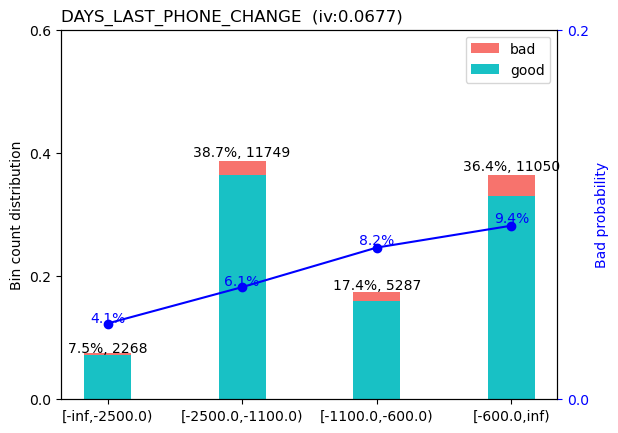

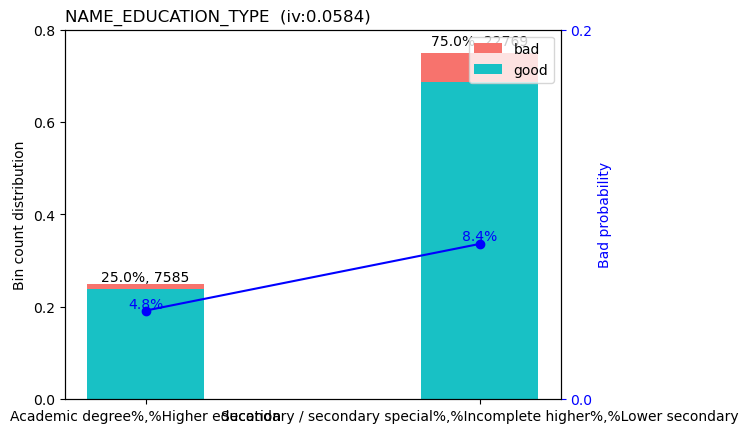

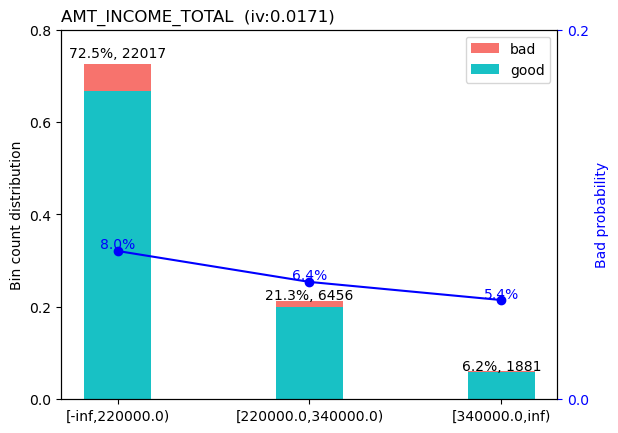

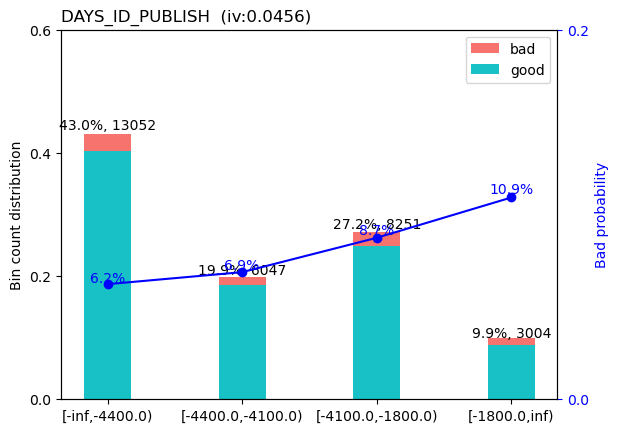

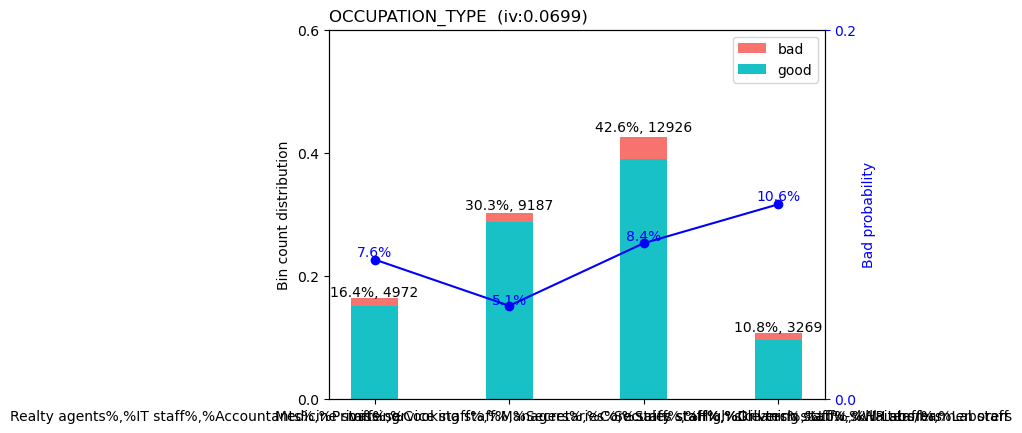

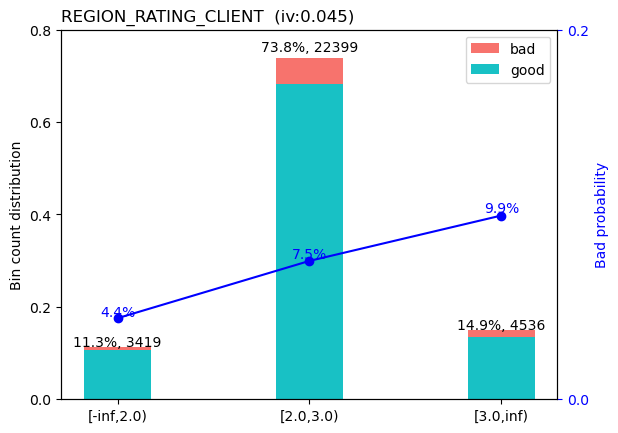

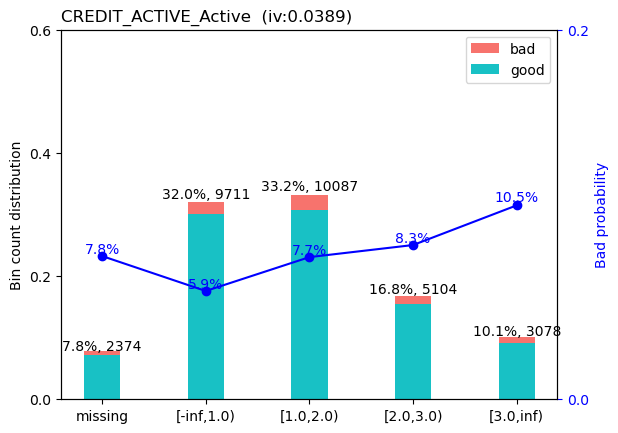

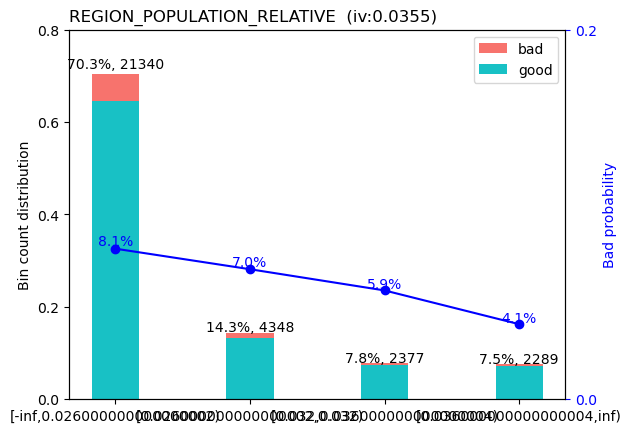

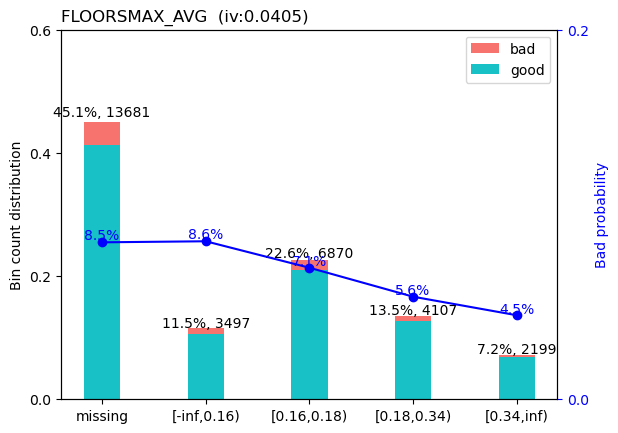

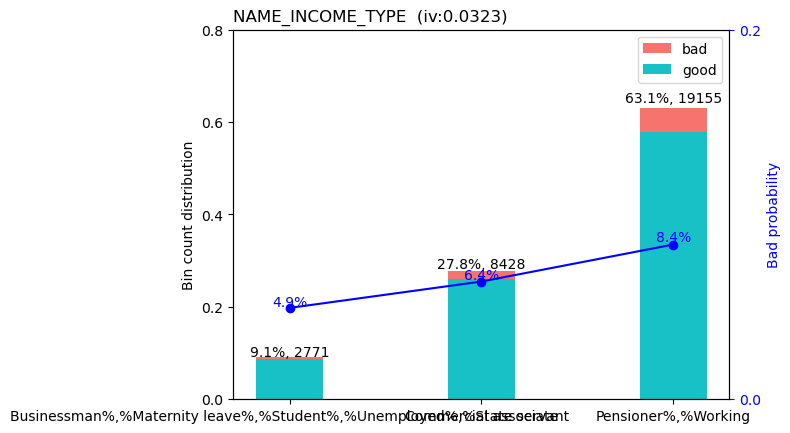

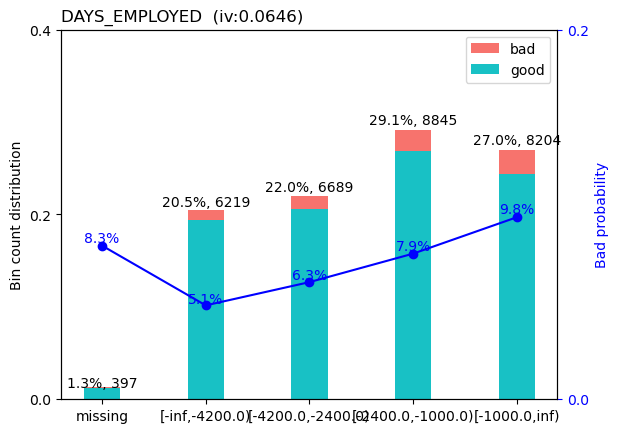

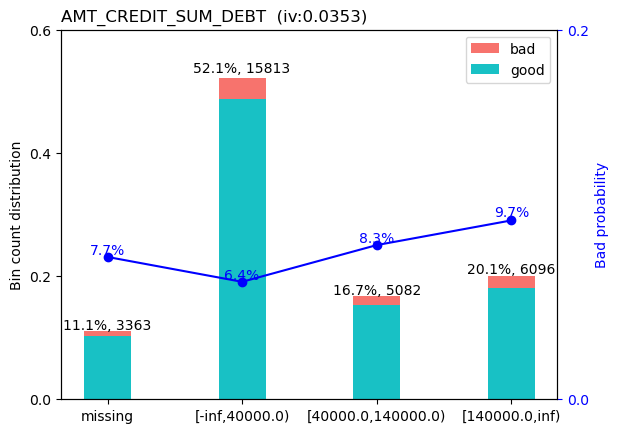

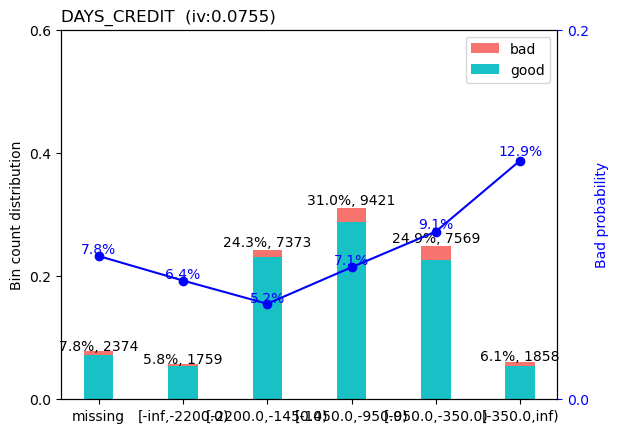

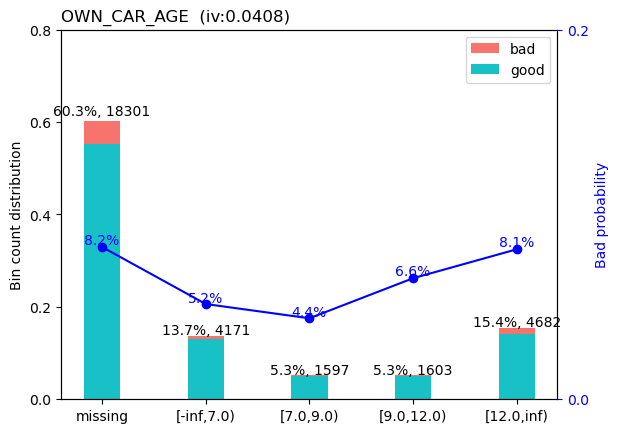

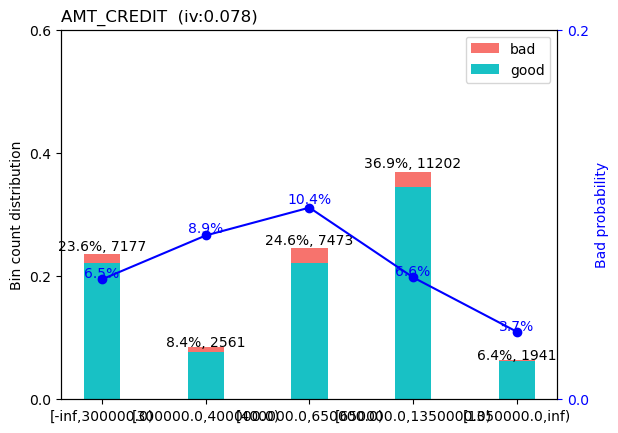

In [32]:
#Check the bins monotonicity
sc.woebin_plot(bins)

**TRAIN TEST (before WOE bins adjustments)**

In [33]:
train, test = sc.split_df(merged_df3, 'TARGET', ratio=0.7).values()
print(train.shape)
print(test.shape)

train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)
train_woe

(21248, 16)
(9106, 16)
[INFO] converting into woe values ...
[INFO] converting into woe values ...


,TARGET,OCCUPATION_TYPE_woe,REGION_RATING_CLIENT_woe,CREDIT_ACTIVE_Active_woe,DAYS_LAST_PHONE_CHANGE_woe,REGION_POPULATION_RELATIVE_woe,FLOORSMAX_AVG_woe,NAME_INCOME_TYPE_woe,DAYS_EMPLOYED_woe,NAME_EDUCATION_TYPE_woe,DAYS_CREDIT_woe,OWN_CAR_AGE_woe,AMT_CREDIT_SUM_DEBT_woe,AMT_CREDIT_woe,AMT_INCOME_TOTAL_woe,DAYS_ID_PUBLISH_woe
0,0,0.128651,-0.002572,0.026818,0.245129,0.089347,0.134512,-0.175863,0.052875,0.123219,0.207287,0.084953,0.278146,-0.138685,0.072746,0.165606
4,0,0.128651,-0.002572,-0.265137,0.097309,0.089347,0.134512,0.119007,0.297485,0.123219,0.207287,0.101439,-0.178563,-0.155700,-0.179378,0.165606
6,0,0.128651,-0.002572,-0.265137,-0.227819,0.089347,0.141780,0.119007,0.052875,0.123219,-0.398105,0.101439,0.027998,0.354916,-0.179378,0.412552
7,0,-0.419949,-0.002572,-0.265137,-0.227819,0.089347,0.134512,0.119007,0.052875,-0.475978,-0.398105,0.084953,-0.178563,-0.138685,0.072746,-0.093740
9,0,0.008265,-0.002572,-0.265137,0.245129,-0.069293,0.141780,0.119007,0.297485,0.123219,-0.167098,0.101439,-0.178563,0.181228,0.072746,-0.093740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33610,0,0.128651,-0.002572,-0.265137,-0.640567,-0.069293,0.141780,0.119007,-0.415857,-0.475978,0.207287,0.101439,-0.178563,0.181228,0.072746,0.165606
33611,0,0.008265,-0.002572,0.368097,-0.227819,0.089347,0.134512,0.119007,-0.415857,-0.475978,-0.398105,0.101439,0.278146,-0.138685,-0.179378,-0.093740
33612,0,-0.419949,-0.002572,0.115431,-0.227819,-0.069293,0.134512,0.119007,0.052875,0.123219,-0.053218,-0.400733,0.278146,-0.155700,0.072746,-0.093740
33613,0,0.374454,-0.002572,0.026818,0.245129,0.089347,-0.057100,0.119007,0.297485,-0.475978,0.207287,0.101439,0.278146,-0.138685,0.072746,-0.200034


In [34]:
#create the X, y parts of data for train and test
y_train = train_woe.loc[:,'TARGET']
X_train = train_woe.loc[:,train_woe.columns != 'TARGET']
y_test = test_woe.loc[:,'TARGET']
X_test = test_woe.loc[:,train_woe.columns != 'TARGET']

#create a logistic regression model object
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[ 0.69350208  0.63132624  0.64135406  0.68170182  0.24092037  0.37828793
   0.29360143  0.79766137  0.52545533  0.42071902  0.57192794  0.69002361
   0.70100775 -0.12022256  0.80543554]]
[0.00552871]


In [35]:
#scorecard
card = sc.scorecard(bins, lr, X_train.columns, points0 = 600, odds0 = 1/20, pdo = 20,
      basepoints_eq0 = True)

pprint.pprint(card)

{'AMT_CREDIT':       variable                   bin  points
57  AMT_CREDIT       [-inf,300000.0)    37.0
58  AMT_CREDIT   [300000.0,400000.0)    31.0
59  AMT_CREDIT   [400000.0,650000.0)    27.0
60  AMT_CREDIT  [650000.0,1350000.0)    37.0
61  AMT_CREDIT       [1350000.0,inf)    50.0,
 'AMT_CREDIT_SUM_DEBT':                variable                 bin  points
42  AMT_CREDIT_SUM_DEBT             missing    34.0
43  AMT_CREDIT_SUM_DEBT      [-inf,40000.0)    38.0
44  AMT_CREDIT_SUM_DEBT  [40000.0,140000.0)    32.0
45  AMT_CREDIT_SUM_DEBT      [140000.0,inf)    29.0,
 'AMT_INCOME_TOTAL':            variable                  bin  points
6  AMT_INCOME_TOTAL      [-inf,220000.0)    34.0
7  AMT_INCOME_TOTAL  [220000.0,340000.0)    34.0
8  AMT_INCOME_TOTAL       [340000.0,inf)    33.0,
 'CREDIT_ACTIVE_Active':                 variable         bin  points
20  CREDIT_ACTIVE_Active     missing    34.0
21  CREDIT_ACTIVE_Active  [-inf,1.0)    39.0
22  CREDIT_ACTIVE_Active   [1.0,2.0)    34.0
23  CR

array([[<Axes: title={'center': 'score'}>]], dtype=object)

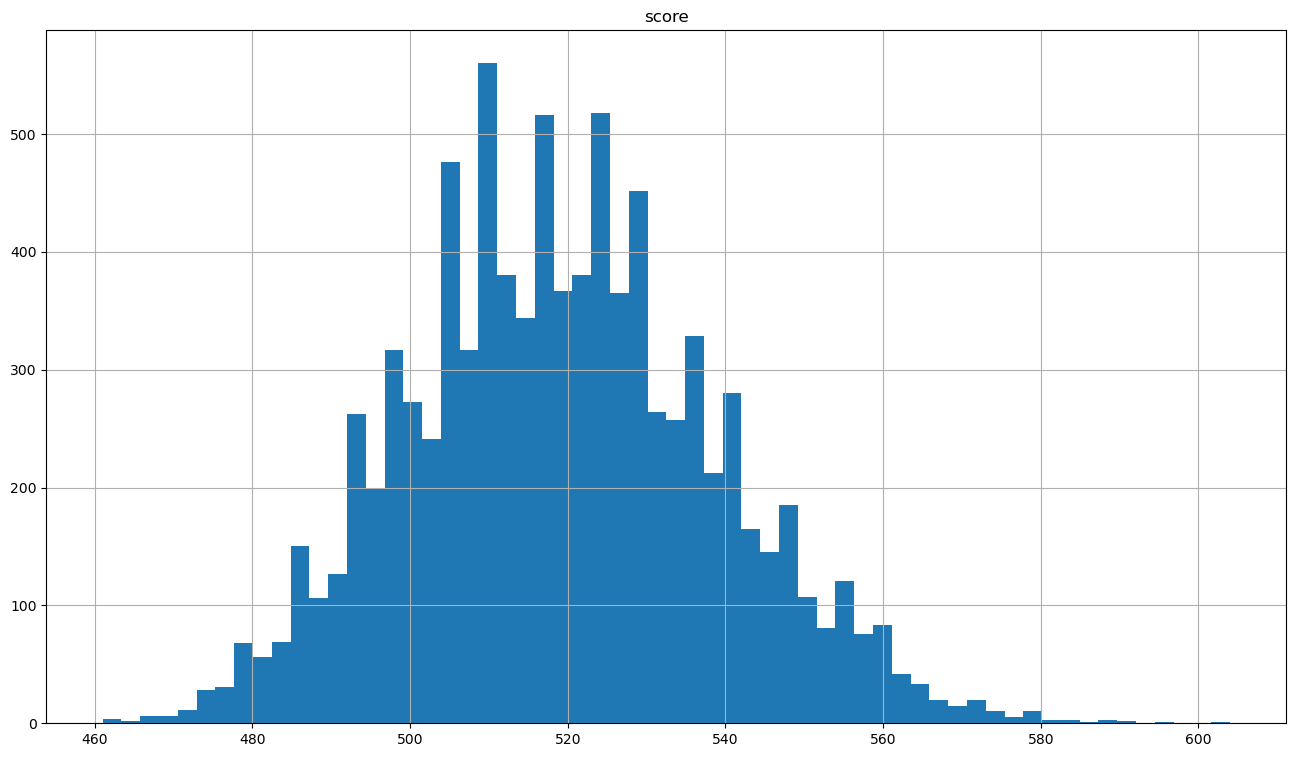

In [36]:
# credit score for samples in test and train
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

# plot the distrubution of scores on test data
test_score.hist(figsize=(16,9),bins=60)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict probabilities for test set
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# Predict class labels for test set
y_pred = lr.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.6170
Precision: 0.1237
Recall: 0.6750
F1 Score: 0.2091
ROC AUC Score: 0.7013


**Adjusting WOE bins**

To ensure that there is no model overfitting

We decided to only adjust DAYS_CREDIT despite AMT_CREDIT and OWN_CAR_AGE are also non-monotonic because of the following reasons:

- AMT_CREDIT: Once amount credit surpasses a certain threshold, lending approval transitions to a manual process where officers rely on their experience and judgement. They may request additional documentation to assess and approve the loan. Therefore, adjusting the bins of AMT_CREDIT to be monotonic doesn't seem necessary in this context.

- OWN_CAR_AGE: We believe that once the car’s age exceeds 9 years old, the maintenance that is required will be more often and costlier given that the spare part might not be easily accessible. In addition, for insurance, the older the car, the average insurer will tend to charge a little more for each additional year of age ( https://www.berryinsurance.com/blog/cost-increase-car-older).

[INFO] creating woe binning ...


C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\condition_fun.py:40: UserWarning: Could not infer format, so each element will 

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:446: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:447: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum, 'bin':lambda x:'%,%'.join(x)}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:447: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callabl

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:446: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:447: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum, 'bin':lambda x:'%,%'.join(x)}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:447: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callabl

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index().assign(bin=lambda x: x['bstbin'])\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided cal

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  init_bin = dtm.groupby('bin', group_keys=False)['y'].agg([n0, n1])\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep c

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index().assign(bin=lambda x: x['bstbin'])\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided cal

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index().assign(bin=lambda x: x['bstbin'])\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided cal

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
C:\Users\William Lay\anaconda3\Lib\site-packages\scorecardpy\woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

Binning on 30354 rows and 16 columns in 00:00:10


{'DAYS_LAST_PHONE_CHANGE': <Figure size 640x480 with 2 Axes>,
 'NAME_EDUCATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'AMT_INCOME_TOTAL': <Figure size 640x480 with 2 Axes>,
 'DAYS_ID_PUBLISH': <Figure size 640x480 with 2 Axes>,
 'OCCUPATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'REGION_RATING_CLIENT': <Figure size 640x480 with 2 Axes>,
 'CREDIT_ACTIVE_Active': <Figure size 640x480 with 2 Axes>,
 'REGION_POPULATION_RELATIVE': <Figure size 640x480 with 2 Axes>,
 'FLOORSMAX_AVG': <Figure size 640x480 with 2 Axes>,
 'NAME_INCOME_TYPE': <Figure size 640x480 with 2 Axes>,
 'DAYS_EMPLOYED': <Figure size 640x480 with 2 Axes>,
 'AMT_CREDIT_SUM_DEBT': <Figure size 640x480 with 2 Axes>,
 'DAYS_CREDIT': <Figure size 640x480 with 2 Axes>,
 'OWN_CAR_AGE': <Figure size 640x480 with 2 Axes>,
 'AMT_CREDIT': <Figure size 640x480 with 2 Axes>}

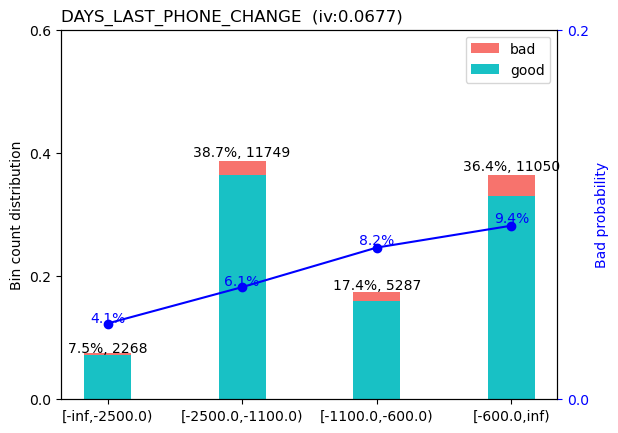

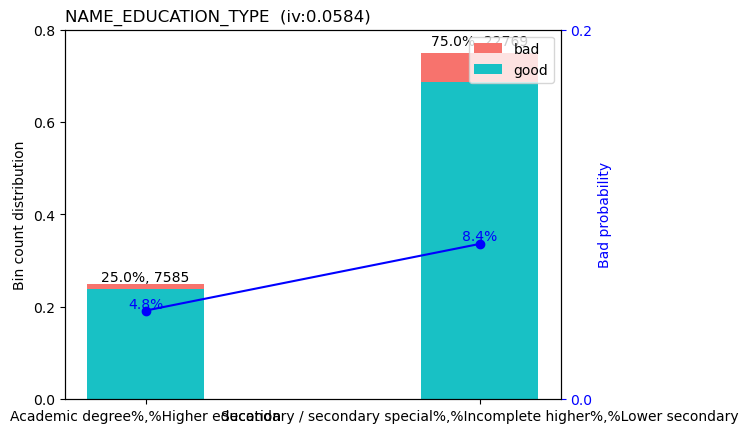

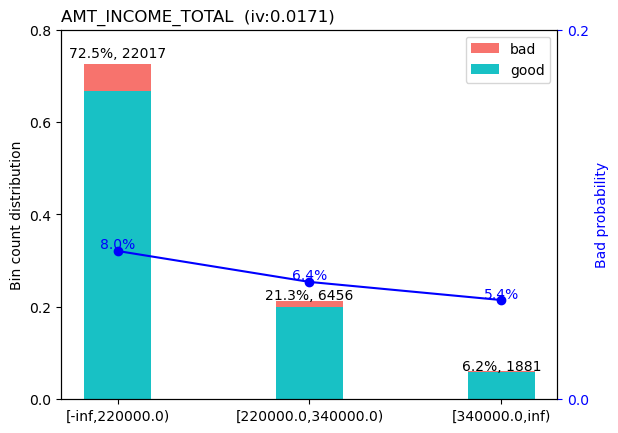

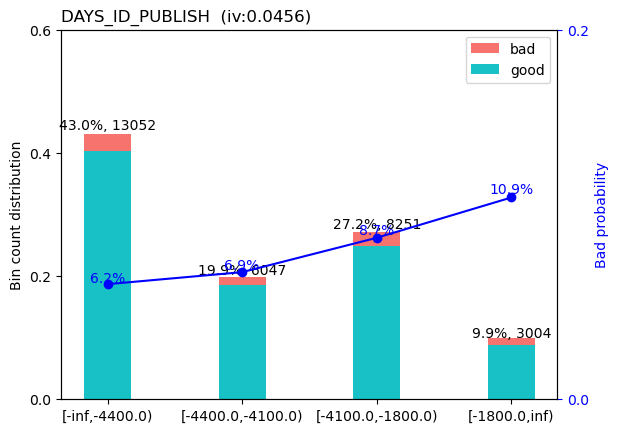

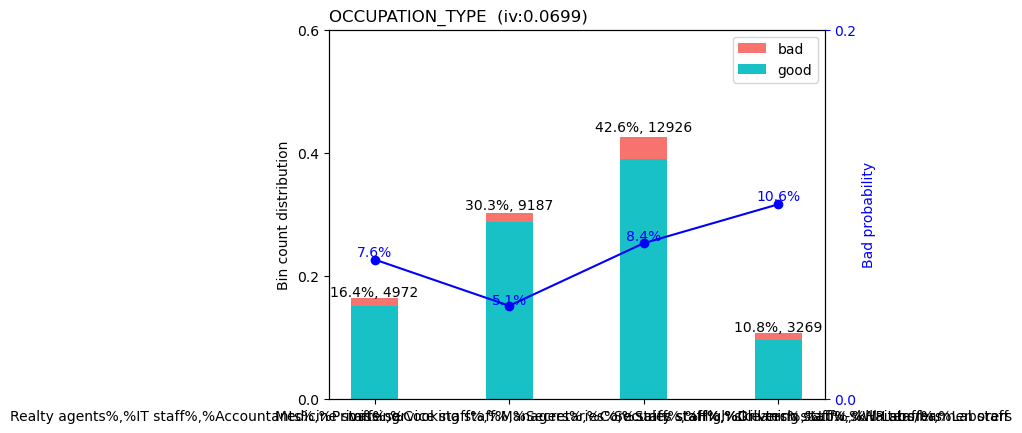

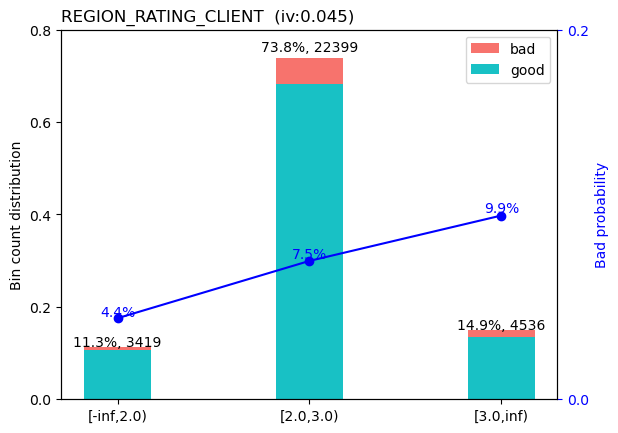

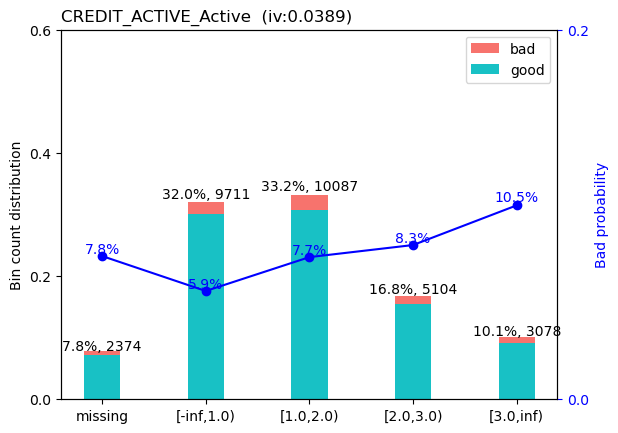

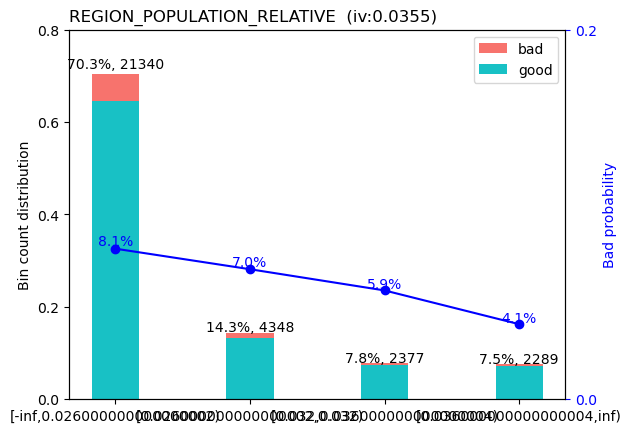

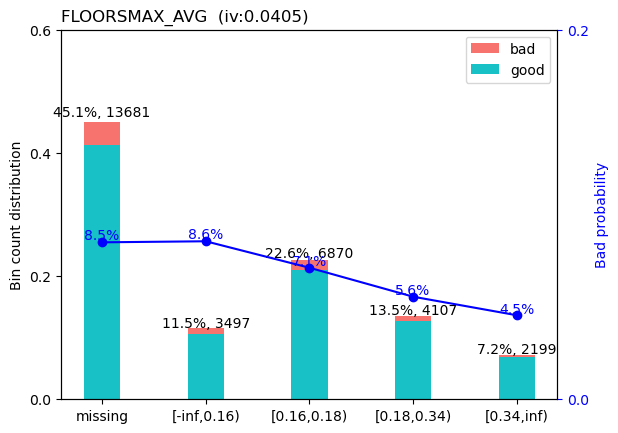

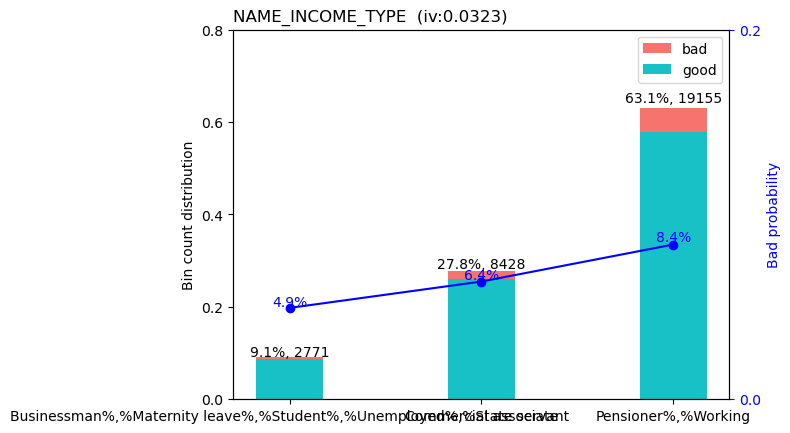

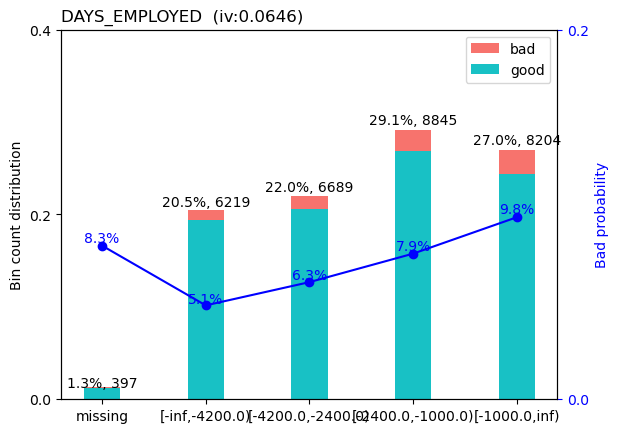

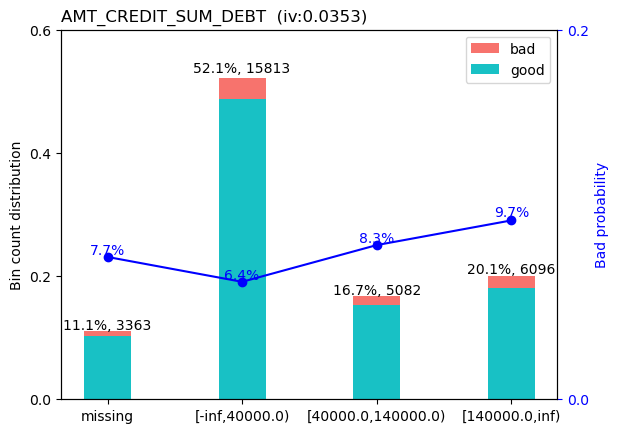

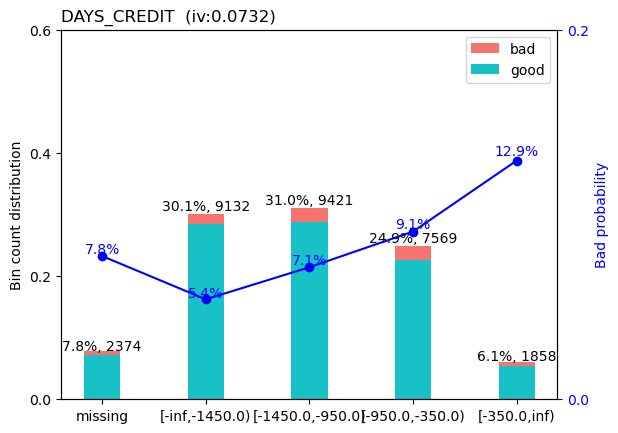

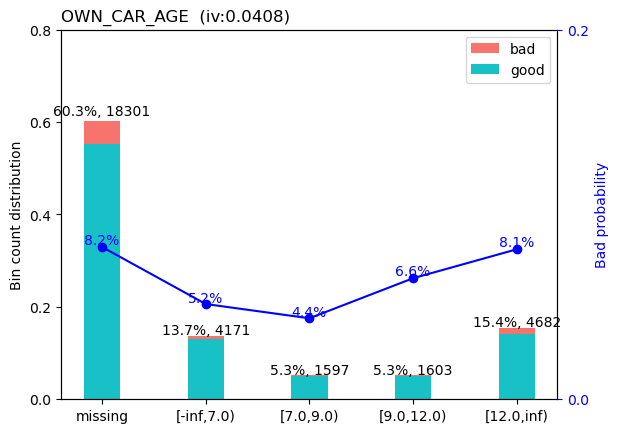

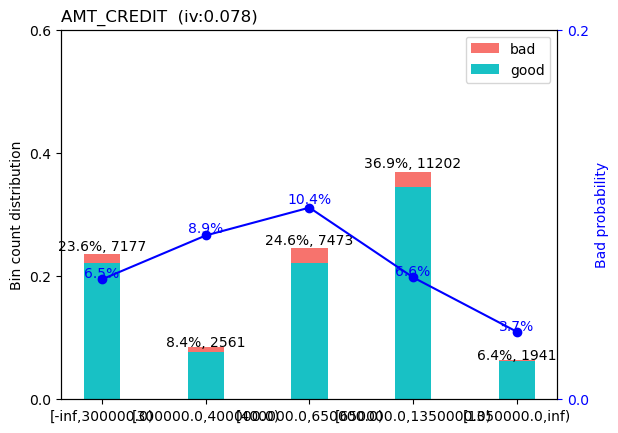

In [38]:
breaks_adj = {
    'DAYS_CREDIT': [-1450, -950, -350],
}

bins2 = sc.woebin(merged_df3, y='TARGET',breaks_list=breaks_adj)
sc.woebin_plot(bins2)

In [39]:
#bins2
for variables , bindetails in bins2.items():
    print(variables , " : ")
    display(bindetails)
    print("--"*50)

DAYS_LAST_PHONE_CHANGE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_LAST_PHONE_CHANGE,"[-inf,-2500.0)",2268,0.074718,2175,93,0.041005,-0.640567,0.023472,0.067718,-2500.0,False
1,DAYS_LAST_PHONE_CHANGE,"[-2500.0,-1100.0)",11749,0.387066,11036,713,0.060686,-0.227819,0.018244,0.067718,-1100.0,False
2,DAYS_LAST_PHONE_CHANGE,"[-1100.0,-600.0)",5287,0.174178,4853,434,0.082088,0.097309,0.001719,0.067718,-600.0,False
3,DAYS_LAST_PHONE_CHANGE,"[-600.0,inf)",11050,0.364038,10012,1038,0.093937,0.245129,0.024282,0.067718,inf,False


----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_EDUCATION_TYPE,"Academic degree%,%Higher education",7585,0.249885,7221,364,0.047989,-0.475978,0.046363,0.058365,"Academic degree%,%Higher education",False
1,NAME_EDUCATION_TYPE,"Secondary / secondary special%,%Incomplete hig...",22769,0.750115,20855,1914,0.084062,0.123219,0.012002,0.058365,"Secondary / secondary special%,%Incomplete hig...",False


----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_INCOME_TOTAL,"[-inf,220000.0)",22017,0.725341,20250,1767,0.080256,0.072746,0.003959,0.017119,220000.0,False
1,AMT_INCOME_TOTAL,"[220000.0,340000.0)",6456,0.212690,6046,410,0.063507,-0.179378,0.006343,0.017119,340000.0,False
2,AMT_INCOME_TOTAL,"[340000.0,inf)",1881,0.061969,1780,101,0.053695,-0.357631,0.006817,0.017119,inf,False


----------------------------------------------------------------------------------------------------
DAYS_ID_PUBLISH  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_ID_PUBLISH,"[-inf,-4400.0)",13052,0.429993,12239,813,0.062289,-0.200034,0.015809,0.045571,-4400.0,False
1,DAYS_ID_PUBLISH,"[-4400.0,-4100.0)",6047,0.199216,5631,416,0.068794,-0.093740,0.001682,0.045571,-4100.0,False
2,DAYS_ID_PUBLISH,"[-4100.0,-1800.0)",8251,0.271826,7530,721,0.087383,0.165606,0.008000,0.045571,-1800.0,False
3,DAYS_ID_PUBLISH,"[-1800.0,inf)",3004,0.098966,2676,328,0.109188,0.412552,0.020080,0.045571,inf,False


----------------------------------------------------------------------------------------------------
OCCUPATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OCCUPATION_TYPE,missing,4972,0.163800,4596,376,0.075623,0.008265,0.000011,0.069906,missing,True
1,OCCUPATION_TYPE,"Realty agents%,%IT staff%,%Accountants%,%Priva...",9187,0.302662,8722,465,0.050615,-0.419949,0.044737,0.069906,"Realty agents%,%IT staff%,%Accountants%,%Priva...",False
2,OCCUPATION_TYPE,"Medicine staff%,%Cooking staff%,%Secretaries%,...",12926,0.425842,11834,1092,0.084481,0.128651,0.007445,0.069906,"Medicine staff%,%Cooking staff%,%Secretaries%,...",False
3,OCCUPATION_TYPE,"Security staff%,%Drivers%,%Low-skill Laborers",3269,0.107696,2924,345,0.105537,0.374454,0.017713,0.069906,"Security staff%,%Drivers%,%Low-skill Laborers",False


----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_RATING_CLIENT,"[-inf,2.0)",3419,0.112638,3269,150,0.043872,-0.569987,0.028834,0.045004,2.0,False
1,REGION_RATING_CLIENT,"[2.0,3.0)",22399,0.737926,20722,1677,0.074869,-0.002572,0.000005,0.045004,3.0,False
2,REGION_RATING_CLIENT,"[3.0,inf)",4536,0.149437,4085,451,0.099427,0.308008,0.016165,0.045004,inf,False


----------------------------------------------------------------------------------------------------
CREDIT_ACTIVE_Active  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CREDIT_ACTIVE_Active,missing,2374,0.078210,2190,184,0.077506,0.034896,0.000097,0.038871,missing,True
1,CREDIT_ACTIVE_Active,"[-inf,1.0)",9711,0.319925,9142,569,0.058593,-0.265137,0.020107,0.038871,1.0,False
2,CREDIT_ACTIVE_Active,"[1.0,2.0)",10087,0.332312,9311,776,0.076931,0.026818,0.000242,0.038871,2.0,False
3,CREDIT_ACTIVE_Active,"[2.0,3.0)",5104,0.168149,4678,426,0.083464,0.115431,0.002353,0.038871,3.0,False
4,CREDIT_ACTIVE_Active,"[3.0,inf)",3078,0.101403,2755,323,0.104938,0.368097,0.016073,0.038871,inf,False


----------------------------------------------------------------------------------------------------
REGION_POPULATION_RELATIVE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_POPULATION_RELATIVE,"[-inf,0.026000000000000002)",21340,0.703037,19601,1739,0.081490,0.089347,0.005830,0.035539,0.026000000000000002,False
1,REGION_POPULATION_RELATIVE,"[0.026000000000000002,0.032)",4348,0.143243,4042,306,0.070377,-0.069293,0.000668,0.035539,0.032,False
2,REGION_POPULATION_RELATIVE,"[0.032,0.036000000000000004)",2377,0.078309,2237,140,0.058898,-0.259631,0.004730,0.035539,0.036000000000000004,False
3,REGION_POPULATION_RELATIVE,"[0.036000000000000004,inf)",2289,0.075410,2196,93,0.040629,-0.650176,0.024311,0.035539,inf,False


----------------------------------------------------------------------------------------------------
FLOORSMAX_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLOORSMAX_AVG,missing,13681,0.450715,12519,1162,0.084935,0.134512,0.008636,0.040522,missing,True
1,FLOORSMAX_AVG,"[-inf,0.16)",3497,0.115207,3198,299,0.085502,0.141780,0.002460,0.040522,0.16,False
2,FLOORSMAX_AVG,"[0.16,0.18)",6870,0.226329,6381,489,0.071179,-0.057100,0.000720,0.040522,0.18,False
3,FLOORSMAX_AVG,"[0.18,0.34)",4107,0.135303,3879,228,0.055515,-0.322370,0.012274,0.040522,0.34,False
4,FLOORSMAX_AVG,"[0.34,inf)",2199,0.072445,2099,100,0.045475,-0.532429,0.016432,0.040522,inf,False


----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_INCOME_TYPE,"Businessman%,%Maternity leave%,%Student%,%Unem...",2771,0.091289,2634,137,0.049441,-0.444661,0.014975,0.032347,"Businessman%,%Maternity leave%,%Student%,%Unem...",False
1,NAME_INCOME_TYPE,Commercial associate,8428,0.277657,7891,537,0.063716,-0.175863,0.007971,0.032347,Commercial associate,False
2,NAME_INCOME_TYPE,"Pensioner%,%Working",19155,0.631054,17551,1604,0.083738,0.119007,0.009402,0.032347,"Pensioner%,%Working",False


----------------------------------------------------------------------------------------------------
DAYS_EMPLOYED  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_EMPLOYED,missing,397,0.013079,364,33,0.083123,0.110971,0.000169,0.064615,missing,True
1,DAYS_EMPLOYED,"[-inf,-4200.0)",6219,0.204882,5903,316,0.050812,-0.415857,0.029747,0.064615,-4200.0,False
2,DAYS_EMPLOYED,"[-4200.0,-2400.0)",6689,0.220366,6265,424,0.063388,-0.181383,0.006714,0.064615,-2400.0,False
3,DAYS_EMPLOYED,"[-2400.0,-1000.0)",8845,0.291395,8148,697,0.078802,0.052875,0.000833,0.064615,-1000.0,False
4,DAYS_EMPLOYED,"[-1000.0,inf)",8204,0.270277,7396,808,0.098489,0.297485,0.027151,0.064615,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT_SUM_DEBT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT_SUM_DEBT,missing,3363,0.110793,3104,259,0.077015,0.027998,0.000088,0.035307,missing,True
1,AMT_CREDIT_SUM_DEBT,"[-inf,40000.0)",15813,0.520953,14808,1005,0.063555,-0.178563,0.015401,0.035307,40000.0,False
2,AMT_CREDIT_SUM_DEBT,"[40000.0,140000.0)",5082,0.167424,4658,424,0.083432,0.115009,0.002326,0.035307,140000.0,False
3,AMT_CREDIT_SUM_DEBT,"[140000.0,inf)",6096,0.200830,5506,590,0.096785,0.278146,0.017492,0.035307,inf,False


----------------------------------------------------------------------------------------------------
DAYS_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_CREDIT,missing,2374,0.078210,2190,184,0.077506,0.034896,0.000097,0.073215,missing,True
1,DAYS_CREDIT,"[-inf,-1450.0)",9132,0.300850,8638,494,0.054095,-0.349774,0.031762,0.073215,-1450.0,False
2,DAYS_CREDIT,"[-1450.0,-950.0)",9421,0.310371,8748,673,0.071436,-0.053218,0.000859,0.073215,-950.0,False
3,DAYS_CREDIT,"[-950.0,-350.0)",7569,0.249358,6882,687,0.090765,0.207287,0.011703,0.073215,-350.0,False
4,DAYS_CREDIT,"[-350.0,inf)",1858,0.061211,1618,240,0.129171,0.603310,0.028794,0.073215,inf,False


----------------------------------------------------------------------------------------------------
OWN_CAR_AGE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OWN_CAR_AGE,missing,18301,0.602919,16793,1508,0.082400,0.101439,0.006478,0.040846,missing,True
1,OWN_CAR_AGE,"[-inf,7.0)",4171,0.137412,3956,215,0.051546,-0.400733,0.018643,0.040846,7.0,False
2,OWN_CAR_AGE,"[7.0,9.0)",1597,0.052613,1527,70,0.043832,-0.570948,0.013508,0.040846,9.0,False
3,OWN_CAR_AGE,"[9.0,12.0)",1603,0.052810,1498,105,0.065502,-0.146309,0.001063,0.040846,12.0,False
4,OWN_CAR_AGE,"[12.0,inf)",4682,0.154247,4302,380,0.081162,0.084953,0.001154,0.040846,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT,"[-inf,300000.0)",7177,0.236443,6711,466,0.064930,-0.155700,0.005366,0.078038,300000.0,False
1,AMT_CREDIT,"[300000.0,400000.0)",2561,0.084371,2334,227,0.088637,0.181228,0.002993,0.078038,400000.0,False
2,AMT_CREDIT,"[400000.0,650000.0)",7473,0.246195,6698,775,0.103707,0.354916,0.036075,0.078038,650000.0,False
3,AMT_CREDIT,"[650000.0,1350000.0)",11202,0.369045,10463,739,0.065970,-0.138685,0.006693,0.078038,1350000.0,False
4,AMT_CREDIT,"[1350000.0,inf)",1941,0.063945,1870,71,0.036579,-0.759397,0.026911,0.078038,inf,False


----------------------------------------------------------------------------------------------------


**Train and Test after adjustment**

In [40]:
train, test = sc.split_df(merged_df3, 'TARGET', ratio=0.7).values()
print(train.shape)
print(test.shape)

(21248, 16)
(9106, 16)


In [41]:
train_woe = sc.woebin_ply(train, bins2)
test_woe = sc.woebin_ply(test, bins2)
train_woe

[INFO] converting into woe values ...
[INFO] converting into woe values ...


,TARGET,OCCUPATION_TYPE_woe,REGION_RATING_CLIENT_woe,CREDIT_ACTIVE_Active_woe,DAYS_LAST_PHONE_CHANGE_woe,REGION_POPULATION_RELATIVE_woe,FLOORSMAX_AVG_woe,NAME_INCOME_TYPE_woe,DAYS_EMPLOYED_woe,NAME_EDUCATION_TYPE_woe,DAYS_CREDIT_woe,OWN_CAR_AGE_woe,AMT_CREDIT_SUM_DEBT_woe,AMT_CREDIT_woe,AMT_INCOME_TOTAL_woe,DAYS_ID_PUBLISH_woe
0,0,0.128651,-0.002572,0.026818,0.245129,0.089347,0.134512,-0.175863,0.052875,0.123219,0.207287,0.084953,0.278146,-0.138685,0.072746,0.165606
4,0,0.128651,-0.002572,-0.265137,0.097309,0.089347,0.134512,0.119007,0.297485,0.123219,0.207287,0.101439,-0.178563,-0.155700,-0.179378,0.165606
6,0,0.128651,-0.002572,-0.265137,-0.227819,0.089347,0.141780,0.119007,0.052875,0.123219,-0.349774,0.101439,0.027998,0.354916,-0.179378,0.412552
7,0,-0.419949,-0.002572,-0.265137,-0.227819,0.089347,0.134512,0.119007,0.052875,-0.475978,-0.349774,0.084953,-0.178563,-0.138685,0.072746,-0.093740
9,0,0.008265,-0.002572,-0.265137,0.245129,-0.069293,0.141780,0.119007,0.297485,0.123219,-0.349774,0.101439,-0.178563,0.181228,0.072746,-0.093740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33610,0,0.128651,-0.002572,-0.265137,-0.640567,-0.069293,0.141780,0.119007,-0.415857,-0.475978,0.207287,0.101439,-0.178563,0.181228,0.072746,0.165606
33611,0,0.008265,-0.002572,0.368097,-0.227819,0.089347,0.134512,0.119007,-0.415857,-0.475978,-0.349774,0.101439,0.278146,-0.138685,-0.179378,-0.093740
33612,0,-0.419949,-0.002572,0.115431,-0.227819,-0.069293,0.134512,0.119007,0.052875,0.123219,-0.053218,-0.400733,0.278146,-0.155700,0.072746,-0.093740
33613,0,0.374454,-0.002572,0.026818,0.245129,0.089347,-0.057100,0.119007,0.297485,-0.475978,0.207287,0.101439,0.278146,-0.138685,0.072746,-0.200034


In [42]:
#create the X, y parts of data for train and test
y_train = train_woe.loc[:,'TARGET']
X_train = train_woe.loc[:,train_woe.columns != 'TARGET']
y_test = test_woe.loc[:,'TARGET']
X_test = test_woe.loc[:,train_woe.columns != 'TARGET']

#create a logistic regression model object
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[ 0.69400469  0.62868339  0.62629892  0.68615539  0.24393056  0.38103476
   0.29393775  0.79956022  0.52649278  0.41041297  0.57231112  0.69511749
   0.70154466 -0.11847414  0.80640931]]
[0.00525422]


In [43]:
card = sc.scorecard(bins2, lr, X_train.columns, points0 = 600, odds0 = 1/20, pdo = 20,
      basepoints_eq0 = True)

pprint.pprint(card)

{'AMT_CREDIT':       variable                   bin  points
56  AMT_CREDIT       [-inf,300000.0)    37.0
57  AMT_CREDIT   [300000.0,400000.0)    31.0
58  AMT_CREDIT   [400000.0,650000.0)    27.0
59  AMT_CREDIT  [650000.0,1350000.0)    37.0
60  AMT_CREDIT       [1350000.0,inf)    50.0,
 'AMT_CREDIT_SUM_DEBT':                variable                 bin  points
42  AMT_CREDIT_SUM_DEBT             missing    34.0
43  AMT_CREDIT_SUM_DEBT      [-inf,40000.0)    38.0
44  AMT_CREDIT_SUM_DEBT  [40000.0,140000.0)    32.0
45  AMT_CREDIT_SUM_DEBT      [140000.0,inf)    29.0,
 'AMT_INCOME_TOTAL':            variable                  bin  points
6  AMT_INCOME_TOTAL      [-inf,220000.0)    34.0
7  AMT_INCOME_TOTAL  [220000.0,340000.0)    34.0
8  AMT_INCOME_TOTAL       [340000.0,inf)    33.0,
 'CREDIT_ACTIVE_Active':                 variable         bin  points
20  CREDIT_ACTIVE_Active     missing    34.0
21  CREDIT_ACTIVE_Active  [-inf,1.0)    39.0
22  CREDIT_ACTIVE_Active   [1.0,2.0)    34.0
23  CR

array([[<Axes: title={'center': 'score'}>]], dtype=object)

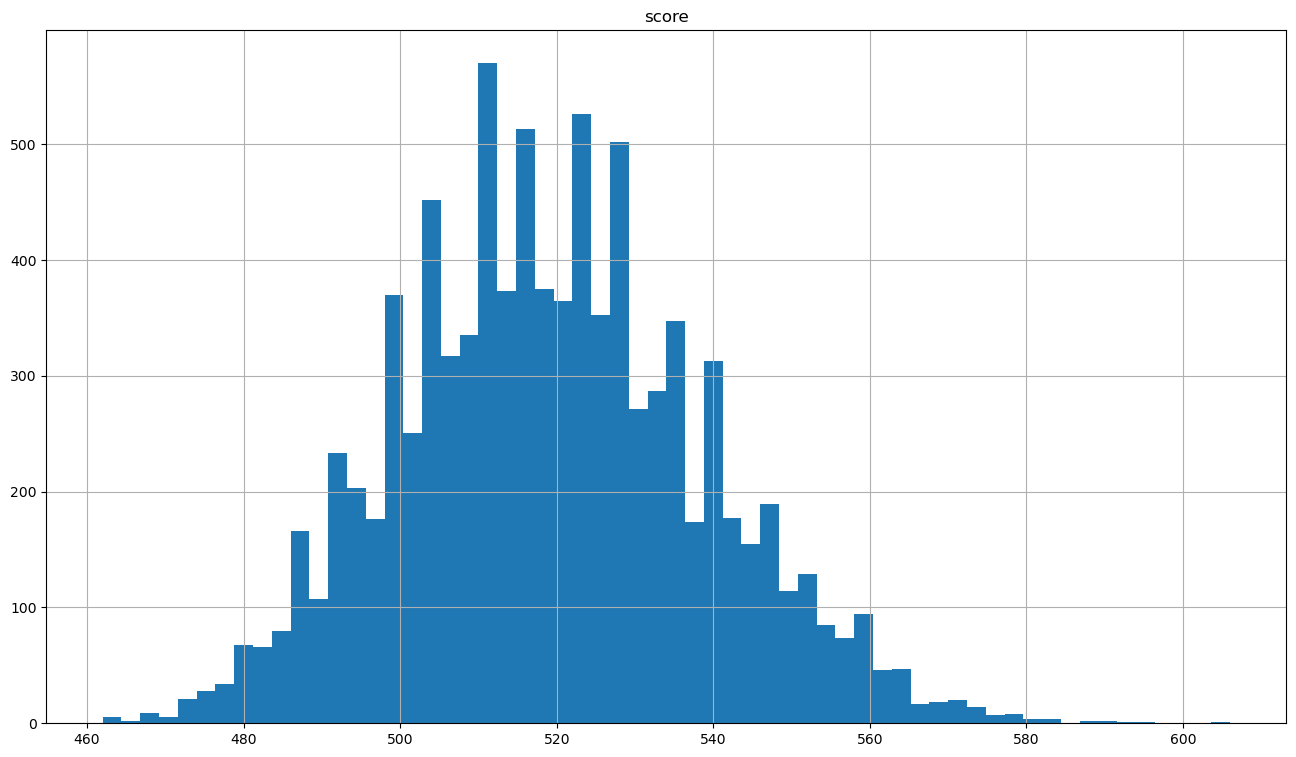

In [44]:
# credit score for samples in test and train
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

# plot the distrubution of scores on test data
test_score.hist(figsize=(16,9),bins=60)

In [45]:
# Predict probabilities for test set
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# Predict class labels for test set
y_pred = lr.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.6164
Precision: 0.1237
Recall: 0.6764
F1 Score: 0.2092
ROC AUC Score: 0.7009
